In [13]:
from importlib import reload
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
import os
import random
from tqdm import tqdm
import copy
from PIL import Image

In [5]:
import time
import torch
from torchvision import models, transforms
from autoencoder import Autoencoder as AE

In [6]:
import gnf

In [4]:
import data_utils
reload(data_utils)

data_ranges = [
    [ [-14.0, -2.0], [6.0, 16.0] ],
    [ [2.0, 15.0],   [-8.0, 6.0] ],
    [ [-12.0, -4.0], [-14.0, -6.0] ]
]
data, labels = data_utils.generate_data(data_ranges, length=100)

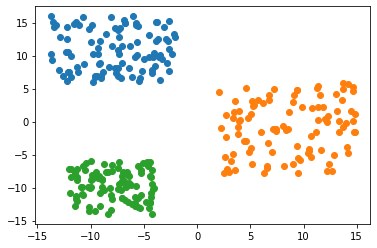

In [5]:
data_sep, uniq_labels = data_utils.split_data(data, labels)
data_utils.plt_graph_sep_data(data_sep)

In [7]:
reload(gnf)
gnf_model = gnf.GNF()
neurons, error = gnf_model.train(data,
                epochs=1000, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=1)

 42%|██████████████████████████████████████████████▌                                                                | 420/1000 [00:49<01:08,  8.43it/s]

Error target met!


# far apart data

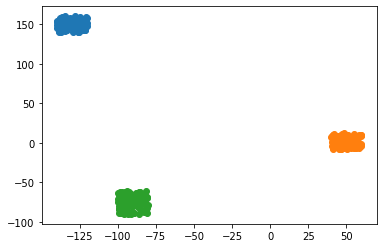

In [10]:
far_data_ranges = [
    [ [-140.0, -120.0], [140.0, 160.0] ],
    [ [40.0, 60.0],   [-8.0, 12.0] ],
    [ [-100.0, -80.0], [-90.0, -60.0] ]
]
far_data, far_labels = data_utils.generate_data(far_data_ranges, length=100)
far_data_sep, far_uniq_labels = data_utils.split_data(far_data, far_labels)
data_utils.plt_graph_sep_data(far_data_sep)

In [11]:
reload(gnf)
gnf_model = gnf.GNF()
neurons, error = gnf_model.train(far_data,
                epochs=1000, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=1)

 86%|███████████████████████████████████████████████████████████████████████████████████████████████▍               | 860/1000 [02:47<00:27,  5.15it/s]

Error target met!


# Paint data

In [4]:
from PIL import Image

In [5]:
paint_class_1 = Image.open('data/paint_dataset_class1.png')
paint_class_1 = np.array(paint_class_1)
paint_class_2 = Image.open('data/paint_dataset_class2.png')
paint_class_2 = np.array(paint_class_2)

In [6]:
class_1 = []
for j,row in enumerate(paint_class_1):
    for i,col in enumerate(row):
        if(not np.array_equal(col, [255, 255, 255, 255])):
            class_1.append(np.array([i,-j]))
class_1 = np.array(class_1)

In [7]:
class_2 = []
for j,row in enumerate(paint_class_2):
    for i,col in enumerate(row):
        if(not np.array_equal(col, [255, 255, 255, 255])):
            class_2.append(np.array([i,-j]))
class_2 = np.array(class_2)

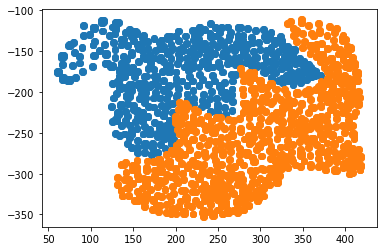

In [10]:
data_utils.plt_graph_sep_data([class_1, class_2])

In [21]:
reload(gnf)
gnf_model = gnf.GNF()
neurons, error = gnf_model.train(class_1,
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=10)

  0%|▍                                                                                                                | 8/2090 [00:00<00:26, 78.35it/s]

## DEBUG: 1. pick two neurons 


  0%|                                                                                                                 | 1/1500 [00:00<03:00,  8.31it/s]

## DEBUG: GNF Loop 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 141.19844191774922 min_dist_2: 204.3624231604235 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 31.622776601683793 min_dist_2: 224.43707358633955 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attempi

  0%|▍                                                                                                                | 5/1500 [00:00<02:12, 11.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 70.03570517957252 min_dist_2: 138.4629914453678 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 64.8459713474939 min_dist_2: 170.47287174210447 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG

  0%|▌                                                                                                                | 7/1500 [00:00<02:13, 11.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 88.76936408468859 min_dist_2: 165.38742394752995 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 56.60388679233962 min_dist_2: 75.20475583365722 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBU

  1%|▊                                                                                                               | 11/1500 [00:00<02:05, 11.91it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 33.24154027718932 min_dist_2: 48.22641131098552 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.150971698084906 min_dist_2: 111.74601319354717 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  1%|▉                                                                                                               | 13/1500 [00:01<02:03, 12.08it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 24.267969819735463 min_dist_2: 35.8462686603656 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.47198353598887 min_dist_2: 57.6457751791939 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG:

  1%|█▎                                                                                                              | 17/1500 [00:01<02:02, 12.10it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 73.45625638134918 min_dist_2: 131.996312634708 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 31.238204179988095 min_dist_2: 73.69005243133059 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG

  1%|█▍                                                                                                              | 19/1500 [00:01<02:04, 11.89it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 31.433780736131776 min_dist_2: 45.67882165849738 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 42.593159989764615 min_dist_2: 53.54925539369471 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  2%|█▋                                                                                                              | 23/1500 [00:01<02:03, 11.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 24.777725905790597 min_dist_2: 49.648506412525265 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 27.777199442674657 min_dist_2: 52.93747920646057 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DE

  2%|█▊                                                                                                              | 25/1500 [00:02<02:02, 12.03it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 58.81654290437362 min_dist_2: 87.45216148817575 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 24.684909438544263 min_dist_2: 60.52848813256373 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBU

  2%|██▏                                                                                                             | 29/1500 [00:02<02:04, 11.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 44.181909031666535 min_dist_2: 56.023354978059814 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 36.550623838096904 min_dist_2: 42.49447372303186 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DE

  2%|██▎                                                                                                             | 31/1500 [00:02<02:05, 11.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 18.871774809110132 min_dist_2: 19.82150255690382 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.3437435939884335 min_dist_2: 28.327965572247464 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DE

  2%|██▌                                                                                                             | 35/1500 [00:02<02:05, 11.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 37.239266128482 min_dist_2: 54.400454939919825 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.715810001524373 min_dist_2: 36.63122387837554 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG

  2%|██▊                                                                                                             | 37/1500 [00:03<02:05, 11.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 35.327475479098126 min_dist_2: 39.95261913099457 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 19.23050422218291 min_dist_2: 25.969498193080653 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  3%|███                                                                                                             | 41/1500 [00:03<02:06, 11.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.550165042388718 min_dist_2: 53.077435784823805 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 27.389077927829568 min_dist_2: 43.64063440283245 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  3%|███▏                                                                                                            | 43/1500 [00:03<02:06, 11.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 23.223508205629685 min_dist_2: 47.975392522890544 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.453272993008191 min_dist_2: 10.759645416836042 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DE

  3%|███▌                                                                                                            | 47/1500 [00:04<02:06, 11.47it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.726384915908638 min_dist_2: 26.358109466647377 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 22.298555266486822 min_dist_2: 40.81962493425458 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  3%|███▋                                                                                                            | 49/1500 [00:04<02:07, 11.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 24.6480534503895 min_dist_2: 26.859904302437982 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 22.32448006858423 min_dist_2: 43.86290066073075 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG

  3%|███▊                                                                                                            | 51/1500 [00:04<02:07, 11.39it/s]

 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 49.627835582077445 min_dist_2: 51.86645108819604 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.232806193216808 min_dist_2: 27.394553082243743 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. D

  4%|████                                                                                                            | 55/1500 [00:04<02:09, 11.19it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 20.22130758175374 min_dist_2: 25.713304477151908 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.778769111458654 min_dist_2: 33.011889229283966 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DE

  4%|████▎                                                                                                           | 57/1500 [00:04<02:09, 11.15it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 26.841864943705097 min_dist_2: 39.29381358037262 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 36.6232650967891 min_dist_2: 55.19581305451499 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG

  4%|████▍                                                                                                           | 59/1500 [00:05<02:09, 11.15it/s]

 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.090147478811353 min_dist_2: 21.330544699519802 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 21.76425325044733 min_dist_2: 26.47065581757736 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Dec

  4%|████▋                                                                                                           | 63/1500 [00:05<02:09, 11.10it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 31.65410493617555 min_dist_2: 34.298613086645325 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.629890470669736 min_dist_2: 20.96097254961184 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  4%|████▊                                                                                                           | 65/1500 [00:05<02:09, 11.06it/s]

 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.4663056915758448 min_dist_2: 13.264429853211809 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 28.02128456941161 min_dist_2: 30.128573331603683 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. D

  4%|█████                                                                                                           | 67/1500 [00:05<02:09, 11.07it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.17633336925974 min_dist_2: 27.519728967702466 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.264226728084541 min_dist_2: 19.785728690926703 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  5%|█████▏                                                                                                          | 69/1500 [00:06<02:11, 10.91it/s]

 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.41265048584748 min_dist_2: 21.845028018276633 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 


  5%|█████▎                                                                                                          | 71/1500 [00:06<02:10, 10.99it/s]

## DEBUG: Two nearest points: min_dist_1: 28.79708016604865 min_dist_2: 30.630027166758865 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 31.254700320816482 min_dist_2: 43.63017612426779 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEB

  5%|█████▌                                                                                                          | 75/1500 [00:06<02:10, 10.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 24.569060876331427 min_dist_2: 41.549120192218474 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 20.11944599552007 min_dist_2: 25.217277252815368 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  5%|█████▋                                                                                                          | 77/1500 [00:06<02:10, 10.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 25.298383339851693 min_dist_2: 54.4259969910364 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 15.02033704462149 min_dist_2: 37.77527247349514 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  5%|█████▉                                                                                                          | 79/1500 [00:06<02:10, 10.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 29.151095401269213 min_dist_2: 55.55805985683869 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.089233074706343 min_dist_2: 29.334644553909033 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  5%|██████                                                                                                          | 81/1500 [00:07<02:10, 10.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.299107549139748 min_dist_2: 33.68539769972595 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.68710649113216 min_dist_2: 15.777623002990428 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBU

  6%|██████▏                                                                                                         | 83/1500 [00:07<02:13, 10.65it/s]

## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 26.097997674599878 min_dist_2: 37.85006962828907 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.516319520615735 min_dist_2: 23.9941300586388 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG

  6%|██████▎                                                                                                         | 85/1500 [00:07<02:13, 10.61it/s]

 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 23.948648436094675 min_dist_2: 31.09923776218025 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 31.968967956331863 min_dist_2: 33.19716531748449 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. De

  6%|██████▋                                                                                                         | 89/1500 [00:07<02:14, 10.52it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 38.61927477349835 min_dist_2: 52.47310920875712 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.946435589736234 min_dist_2: 16.97616319119601 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  6%|██████▊                                                                                                         | 91/1500 [00:08<02:14, 10.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.847887677591856 min_dist_2: 23.678023476890893 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 18.038304664102892 min_dist_2: 21.86897794575259 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  6%|██████▉                                                                                                         | 93/1500 [00:08<02:13, 10.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 20.321971018232983 min_dist_2: 21.332750854665964 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.6296964397215605 min_dist_2: 18.610997519726087 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  6%|███████                                                                                                         | 95/1500 [00:08<02:14, 10.46it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.991256968514833 min_dist_2: 31.5196833019625 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 42.98193747611131 min_dist_2: 44.736796898239575 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  6%|███████▏                                                                                                        | 97/1500 [00:08<02:14, 10.41it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 25.939924340362857 min_dist_2: 29.284882293233952 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.384288875050327 min_dist_2: 23.84378670903317 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  7%|███████▍                                                                                                        | 99/1500 [00:08<02:15, 10.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.706124046577531 min_dist_2: 12.477640680488866 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.24981652169977 min_dist_2: 27.5740621038886 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  7%|███████▍                                                                                                       | 101/1500 [00:09<02:14, 10.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 30.6481595829609 min_dist_2: 39.13200965271048 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 26.86434352040828 min_dist_2: 43.044467980603216 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG

  7%|███████▌                                                                                                       | 103/1500 [00:09<02:14, 10.38it/s]

## DEBUG: Two nearest points: min_dist_1: 14.08313551070423 min_dist_2: 16.050822056580678 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.001916356361332 min_dist_2: 33.276428080852455 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  7%|███████▊                                                                                                       | 105/1500 [00:09<02:14, 10.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 19.190879868240902 min_dist_2: 36.928396516586105 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 26.299058995151434 min_dist_2: 37.7682741892022 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEB

  7%|████████                                                                                                       | 109/1500 [00:09<02:15, 10.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.002642888758771 min_dist_2: 20.994973512492393 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.007197301148673 min_dist_2: 29.650557575556668 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  7%|████████▏                                                                                                      | 111/1500 [00:10<02:15, 10.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.321254819537882 min_dist_2: 20.157401007571885 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.1257909074947303 min_dist_2: 32.97319913322686 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  8%|████████▎                                                                                                      | 113/1500 [00:10<02:17, 10.10it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.457304503876601 min_dist_2: 16.68200921135177 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.997928124227345 min_dist_2: 20.643112092821323 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  8%|████████▌                                                                                                      | 115/1500 [00:10<02:17, 10.05it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.143217153726013 min_dist_2: 18.52606292462378 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 25.621196887752475 min_dist_2: 27.509955807033826 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  8%|████████▋                                                                                                      | 117/1500 [00:10<02:18,  9.98it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.54764890334361 min_dist_2: 21.62821074680195 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.325049089573781 min_dist_2: 30.625657687147857 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  8%|████████▋                                                                                                      | 118/1500 [00:10<02:19,  9.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.827130416157597 min_dist_2: 20.05113656265328 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.420300983144408 min_dist_2: 24.015979635872036 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  8%|████████▉                                                                                                      | 121/1500 [00:11<02:19,  9.85it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 18.10149615240322 min_dist_2: 20.929757661597442 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 27.940865608361257 min_dist_2: 32.43840126308263 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  8%|█████████                                                                                                      | 123/1500 [00:11<02:20,  9.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.656838731356405 min_dist_2: 19.359028782214924 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.75275525374412 min_dist_2: 17.363265534395865 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  8%|█████████▎                                                                                                     | 125/1500 [00:11<02:20,  9.78it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 23.85806343191538 min_dist_2: 30.071932055144774 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.498346953885126 min_dist_2: 16.042572740153183 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  8%|█████████▎                                                                                                     | 126/1500 [00:11<02:21,  9.72it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.837645453549452 min_dist_2: 28.27557844974393 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 48.33328943828124 min_dist_2: 58.35749052339844 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  9%|█████████▍                                                                                                     | 128/1500 [00:11<02:27,  9.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.968546953564305 min_dist_2: 17.07987436672715 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.6455863118783896 min_dist_2: 20.903010267907685 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  9%|█████████▌                                                                                                     | 130/1500 [00:11<02:25,  9.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 24.818815747514382 min_dist_2: 27.38949187000525 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.84471928558837 min_dist_2: 19.81158805600114 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  9%|█████████▊                                                                                                     | 133/1500 [00:12<02:22,  9.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.793864609640694 min_dist_2: 14.125168845061534 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 19.466356569574835 min_dist_2: 24.00869996625924 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  9%|█████████▉                                                                                                     | 134/1500 [00:12<02:22,  9.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 23.283744064337764 min_dist_2: 51.74077545575858 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9423965778408672 min_dist_2: 25.807088786281835 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  9%|██████████▏                                                                                                    | 137/1500 [00:12<02:22,  9.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.25140634480893 min_dist_2: 22.664487004850532 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 21.94210265532838 min_dist_2: 22.092139605453884 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  9%|██████████▏                                                                                                    | 138/1500 [00:12<02:22,  9.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.756672016978765 min_dist_2: 20.541883735731115 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.088135960050431 min_dist_2: 16.117175546274684 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  9%|██████████▎                                                                                                    | 140/1500 [00:13<02:22,  9.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.155335162975076 min_dist_2: 17.43583643769594 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.153286882750976 min_dist_2: 13.807556516413213 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


  9%|██████████▌                                                                                                    | 142/1500 [00:13<02:23,  9.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.675797760612971 min_dist_2: 16.60235157785897 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.470598972925751 min_dist_2: 14.98899624823934 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 10%|██████████▋                                                                                                    | 144/1500 [00:13<02:25,  9.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 31.79407877282688 min_dist_2: 34.20553085500532 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.421084142495934 min_dist_2: 16.029299347079988 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 10%|██████████▊                                                                                                    | 146/1500 [00:13<02:25,  9.28it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.022573406638655 min_dist_2: 15.52995512871562 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.013427268708591 min_dist_2: 15.086965783957437 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 10%|██████████▉                                                                                                    | 148/1500 [00:13<02:26,  9.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.893516172480162 min_dist_2: 33.42083301030564 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.010878907959018 min_dist_2: 22.99964330216578 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 10%|███████████▏                                                                                                   | 151/1500 [00:14<02:25,  9.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.631819362656088 min_dist_2: 25.90552271682566 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.622441271266471 min_dist_2: 14.82391609759696 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 10%|███████████▏                                                                                                   | 152/1500 [00:14<02:26,  9.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.004907418921654 min_dist_2: 20.689641629146877 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 25.763853579086565 min_dist_2: 45.61934077957465 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 10%|███████████▍                                                                                                   | 154/1500 [00:14<02:26,  9.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.85660299541111 min_dist_2: 30.053832604242036 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 15.576935833899096 min_dist_2: 18.67384846841683 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 10%|███████████▌                                                                                                   | 156/1500 [00:14<02:25,  9.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.041594740554933 min_dist_2: 10.98241893893186 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.268652827024763 min_dist_2: 14.645284481104888 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 11%|███████████▋                                                                                                   | 158/1500 [00:14<02:25,  9.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 23.47056443666805 min_dist_2: 39.21362111137806 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.984050427839115 min_dist_2: 29.225519464562904 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 11%|███████████▊                                                                                                   | 160/1500 [00:15<02:26,  9.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.608149205133785 min_dist_2: 18.822822015856175 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.994501586977462 min_dist_2: 21.72866131175891 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 11%|███████████▉                                                                                                   | 162/1500 [00:15<02:26,  9.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.130501476211175 min_dist_2: 13.997148844769042 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.31781418060889 min_dist_2: 14.589992386756848 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 11%|████████████▏                                                                                                  | 164/1500 [00:15<02:26,  9.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 23.92150494895798 min_dist_2: 24.316607384205042 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 26.535807003247825 min_dist_2: 34.23164633969747 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 11%|████████████▎                                                                                                  | 166/1500 [00:15<02:27,  9.05it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.017873221097495 min_dist_2: 13.135344805898633 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 20.306918409707258 min_dist_2: 24.075537784671372 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 11%|████████████▍                                                                                                  | 168/1500 [00:16<02:28,  9.00it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.41083311893251 min_dist_2: 11.595070960561698 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.516018937055405 min_dist_2: 25.607270976612 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 11%|████████████▌                                                                                                  | 170/1500 [00:16<02:30,  8.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 27.887464949706636 min_dist_2: 30.07597115420715 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 18.412648625624197 min_dist_2: 22.99290990135903 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 11%|████████████▋                                                                                                  | 172/1500 [00:16<02:30,  8.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.332815662035125 min_dist_2: 21.94169110232984 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.30101357718079 min_dist_2: 20.966143868467068 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 12%|████████████▉                                                                                                  | 174/1500 [00:16<02:32,  8.71it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.032960182625785 min_dist_2: 16.98098778359691 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.53201784561251 min_dist_2: 24.456505413525395 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 12%|█████████████                                                                                                  | 176/1500 [00:17<02:30,  8.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.483971029882056 min_dist_2: 14.007811755190074 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1886400994765907 min_dist_2: 16.278820492690254 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 12%|█████████████▏                                                                                                 | 178/1500 [00:17<02:29,  8.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8614640363011534 min_dist_2: 19.571152292552938 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 18.603599536631403 min_dist_2: 18.922390129746 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 12%|█████████████▎                                                                                                 | 180/1500 [00:17<02:29,  8.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.832538420107937 min_dist_2: 18.652938656810708 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.951595402701323 min_dist_2: 14.044902967485568 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 12%|█████████████▍                                                                                                 | 182/1500 [00:17<02:31,  8.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 26.66015016865109 min_dist_2: 30.0140842494429 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.693381827335637 min_dist_2: 11.326676348877788 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 12%|█████████████▌                                                                                                 | 184/1500 [00:17<02:32,  8.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.869372808505416 min_dist_2: 18.597072204947338 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 21.94523814880673 min_dist_2: 26.520988082844603 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 12%|█████████████▊                                                                                                 | 186/1500 [00:18<02:31,  8.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.348896330165223 min_dist_2: 17.02169320119139 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 19.497331072306824 min_dist_2: 27.367100104181045 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 13%|█████████████▉                                                                                                 | 188/1500 [00:18<02:34,  8.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.851210691691138 min_dist_2: 16.119253250669292 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.46995586638102 min_dist_2: 20.513014322371372 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 13%|██████████████                                                                                                 | 190/1500 [00:18<02:32,  8.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9523626021913874 min_dist_2: 23.701304725693568 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.796999200613403 min_dist_2: 13.904695295524286 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 13%|██████████████▏                                                                                                | 192/1500 [00:18<02:35,  8.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 22.455417823881984 min_dist_2: 22.631314003128885 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.277502361635385 min_dist_2: 17.281792758774287 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 13%|██████████████▎                                                                                                | 194/1500 [00:19<02:34,  8.47it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.612608564658549 min_dist_2: 13.519747989846502 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.3819353530006255 min_dist_2: 21.50203456238971 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 13%|██████████████▌                                                                                                | 196/1500 [00:19<02:34,  8.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.761191005608086 min_dist_2: 9.292234033210736 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.912751048798611 min_dist_2: 15.22654602910295 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 13%|██████████████▋                                                                                                | 198/1500 [00:19<02:32,  8.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.41880232711438 min_dist_2: 12.802137447516824 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.213152126140052 min_dist_2: 23.208566070669043 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 13%|██████████████▊                                                                                                | 200/1500 [00:19<02:33,  8.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.289001272877228 min_dist_2: 11.268112544515533 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.346069825102072 min_dist_2: 18.097184955783185 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 13%|██████████████▉                                                                                                | 202/1500 [00:20<02:33,  8.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 27.078851752900558 min_dist_2: 30.097421319994275 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6698074371944363 min_dist_2: 13.3679483166887 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 14%|███████████████                                                                                                | 204/1500 [00:20<02:39,  8.12it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.250524434464428 min_dist_2: 22.189074479880443 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.571205541365552 min_dist_2: 16.35854020605528 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 14%|███████████████▏                                                                                               | 206/1500 [00:20<02:38,  8.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.7596763454919 min_dist_2: 22.345765816804548 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1863592480622849 min_dist_2: 17.215826828471446 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 14%|███████████████▍                                                                                               | 208/1500 [00:20<02:36,  8.27it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.127257903023561 min_dist_2: 15.360002762463557 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.787588950850519 min_dist_2: 20.98190690005951 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 14%|███████████████▌                                                                                               | 210/1500 [00:21<02:37,  8.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.921080690200424 min_dist_2: 11.864769759095912 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.180829606435993 min_dist_2: 13.444066022429235 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 14%|███████████████▋                                                                                               | 212/1500 [00:21<02:37,  8.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.218537972976242 min_dist_2: 17.21037928479264 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.21131752703293 min_dist_2: 10.281529546494212 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 14%|███████████████▊                                                                                               | 214/1500 [00:21<02:36,  8.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.496875266202611 min_dist_2: 19.16447742637076 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.266391569585224 min_dist_2: 21.38674904199453 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 14%|███████████████▉                                                                                               | 216/1500 [00:21<02:35,  8.26it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.839428948688733 min_dist_2: 15.956208838036636 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.7095008246930514 min_dist_2: 21.37148976860985 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 15%|████████████████▏                                                                                              | 218/1500 [00:21<02:35,  8.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.85361654765593 min_dist_2: 9.567056994439321 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.784733758850567 min_dist_2: 18.00750157223595 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 15%|████████████████▎                                                                                              | 220/1500 [00:22<02:37,  8.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 18.15181076495711 min_dist_2: 21.076616910080794 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.896873317905056 min_dist_2: 10.508582504062106 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 15%|████████████████▍                                                                                              | 222/1500 [00:22<02:39,  8.04it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5871599604441853 min_dist_2: 10.42402306877472 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.968284151477691 min_dist_2: 19.30701340390861 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 15%|████████████████▌                                                                                              | 224/1500 [00:22<02:41,  7.91it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 25.78698503974647 min_dist_2: 34.99042756790254 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.909493751216483 min_dist_2: 10.06303214026294 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 15%|████████████████▋                                                                                              | 226/1500 [00:23<02:40,  7.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.772594833059715 min_dist_2: 18.426893055795855 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.132607099562963 min_dist_2: 16.704475041568116 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 15%|████████████████▊                                                                                              | 228/1500 [00:23<02:40,  7.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.406004034012824 min_dist_2: 14.433255078178968 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.638171858747619 min_dist_2: 14.10321429290517 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 15%|█████████████████                                                                                              | 230/1500 [00:23<02:47,  7.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2765347291256277 min_dist_2: 10.702624272741666 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.023928714195411 min_dist_2: 5.539729810795988 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 15%|█████████████████▏                                                                                             | 232/1500 [00:23<02:45,  7.67it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.365446060669635 min_dist_2: 10.8544846744139 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.929891603243481 min_dist_2: 17.5055024028138 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 16%|█████████████████▎                                                                                             | 234/1500 [00:24<02:47,  7.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.618206365689277 min_dist_2: 19.094677644563344 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.829367189133304 min_dist_2: 13.043680269124014 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 16%|█████████████████▍                                                                                             | 236/1500 [00:24<02:48,  7.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.991819587442459 min_dist_2: 33.788041043583824 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.878987057957054 min_dist_2: 9.08192621678863 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 16%|█████████████████▌                                                                                             | 238/1500 [00:24<02:49,  7.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.761188570849634 min_dist_2: 14.80626060296054 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.684183804473314 min_dist_2: 15.61203126837776 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 16%|█████████████████▊                                                                                             | 240/1500 [00:24<02:52,  7.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.60097684617179 min_dist_2: 12.937936693687234 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.035049051666793 min_dist_2: 17.542835552872436 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 16%|█████████████████▉                                                                                             | 242/1500 [00:25<02:51,  7.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.437957618274142 min_dist_2: 22.956065289907016 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.561161674903731 min_dist_2: 9.28470800455234 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 16%|██████████████████                                                                                             | 244/1500 [00:25<03:06,  6.72it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.860270473814801 min_dist_2: 18.170017591864585 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9995979697971218 min_dist_2: 13.23024792699731 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 16%|██████████████████▏                                                                                            | 246/1500 [00:25<02:58,  7.04it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.4148188270273254 min_dist_2: 18.03952065500962 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.25286977453094 min_dist_2: 12.383583581343236 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 17%|██████████████████▎                                                                                            | 248/1500 [00:26<02:51,  7.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.205952247604102 min_dist_2: 26.95974614781507 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.676977409023115 min_dist_2: 18.652080384325682 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 17%|██████████████████▌                                                                                            | 250/1500 [00:26<02:46,  7.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.1345744869745555 min_dist_2: 18.851409257893582 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 22.169190171807905 min_dist_2: 25.41632667377856 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 17%|██████████████████▋                                                                                            | 252/1500 [00:26<02:44,  7.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.339439477407739 min_dist_2: 15.010820071536259 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.820474118545416 min_dist_2: 14.064996002816844 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 17%|██████████████████▊                                                                                            | 254/1500 [00:26<02:44,  7.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.390030831158635 min_dist_2: 12.33671452589644 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.3305510280532407 min_dist_2: 17.565376082925237 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 17%|██████████████████▉                                                                                            | 256/1500 [00:27<02:42,  7.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.51925904951951 min_dist_2: 15.98136453090256 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.666945256500227 min_dist_2: 16.094684369478085 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 17%|███████████████████                                                                                            | 258/1500 [00:27<02:47,  7.42it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.2865647580238373 min_dist_2: 12.534416781550265 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.119661259453744 min_dist_2: 12.537454575028168 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 17%|███████████████████▏                                                                                           | 260/1500 [00:27<02:48,  7.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.107967670652857 min_dist_2: 10.598363783532127 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.139242116356742 min_dist_2: 11.700288832870461 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 17%|███████████████████▍                                                                                           | 262/1500 [00:27<02:53,  7.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.230689176207376 min_dist_2: 19.763024721320328 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.686833723503355 min_dist_2: 17.947229623765402 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 18%|███████████████████▌                                                                                           | 264/1500 [00:28<02:53,  7.11it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.802324431341737 min_dist_2: 6.929066387896061 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.060545274661208 min_dist_2: 21.9530259061836 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 18%|███████████████████▋                                                                                           | 266/1500 [00:28<02:51,  7.19it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 19.15609566445843 min_dist_2: 20.175773738176257 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.238967104433405 min_dist_2: 9.32840705182323 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 18%|███████████████████▊                                                                                           | 268/1500 [00:28<02:57,  6.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.138096833225933 min_dist_2: 14.650260121477775 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.031778156446165 min_dist_2: 11.95021733315842 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 18%|███████████████████▉                                                                                           | 270/1500 [00:29<02:52,  7.11it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 15.871885708899732 min_dist_2: 22.40264371526064 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.28346557426252 min_dist_2: 14.482252492412192 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 18%|████████████████████▏                                                                                          | 272/1500 [00:29<02:49,  7.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.008743331953426 min_dist_2: 33.415032712431994 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.6835695192420638 min_dist_2: 16.76315764886212 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 18%|████████████████████▎                                                                                          | 274/1500 [00:29<02:46,  7.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.845721897125133 min_dist_2: 6.264215930604445 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.0194456648420624 min_dist_2: 15.022700940514758 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 18%|████████████████████▍                                                                                          | 276/1500 [00:29<02:45,  7.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.21618232893132 min_dist_2: 17.229089342284425 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.615333669898822 min_dist_2: 17.21530381643141 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 19%|████████████████████▌                                                                                          | 278/1500 [00:30<02:46,  7.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.9377313232910405 min_dist_2: 22.370763236731364 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.934250984153476 min_dist_2: 20.03547225045872 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 19%|████████████████████▋                                                                                          | 280/1500 [00:30<02:53,  7.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.405413092644861 min_dist_2: 12.208308833967296 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.710818895985843 min_dist_2: 16.27336585216597 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 19%|████████████████████▊                                                                                          | 282/1500 [00:30<02:49,  7.17it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.000938120226968 min_dist_2: 5.8928439770543966 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.605034948831163 min_dist_2: 10.598431987530454 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 19%|█████████████████████                                                                                          | 284/1500 [00:30<02:46,  7.30it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.578621398775454 min_dist_2: 12.690083072159137 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.303210380690052 min_dist_2: 16.23157486195554 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 19%|█████████████████████▏                                                                                         | 286/1500 [00:31<02:47,  7.26it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.633413684285662 min_dist_2: 17.07221951929613 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0590635715933048 min_dist_2: 14.667794030365142 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 19%|█████████████████████▎                                                                                         | 288/1500 [00:31<02:47,  7.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.437484613634096 min_dist_2: 9.840939106054293 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.936282969676977 min_dist_2: 11.372954763205495 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 19%|█████████████████████▍                                                                                         | 290/1500 [00:31<02:49,  7.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.04908252281853 min_dist_2: 17.758947518721996 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.225331808116387 min_dist_2: 26.46437186089366 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 19%|█████████████████████▌                                                                                         | 292/1500 [00:32<02:49,  7.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.529531785796674 min_dist_2: 14.521116090061504 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.389073987034068 min_dist_2: 14.500117990918271 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 20%|█████████████████████▊                                                                                         | 294/1500 [00:32<02:47,  7.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.999046806541449 min_dist_2: 11.498081391927757 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.13565453593296 min_dist_2: 16.680807148996983 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 20%|█████████████████████▉                                                                                         | 296/1500 [00:32<02:47,  7.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2548898456091986 min_dist_2: 9.30333803875014 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1330716427863046 min_dist_2: 13.87229256009375 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 20%|██████████████████████                                                                                         | 298/1500 [00:32<02:46,  7.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6146801709289638 min_dist_2: 15.848942774994235 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.22876228171546 min_dist_2: 19.375746104194274 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 20%|██████████████████████▏                                                                                        | 300/1500 [00:33<02:46,  7.19it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8574870773828094 min_dist_2: 12.401906497650065 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.808273169432121 min_dist_2: 18.86971091316731 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 20%|██████████████████████▎                                                                                        | 302/1500 [00:33<02:48,  7.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.038476125470529 min_dist_2: 11.472895811000493 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.488855790339395 min_dist_2: 16.483198183039807 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 20%|██████████████████████▍                                                                                        | 304/1500 [00:33<02:47,  7.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.82816947427735 min_dist_2: 13.352532106551575 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.198671467221101 min_dist_2: 9.704990050937868 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 20%|██████████████████████▋                                                                                        | 306/1500 [00:34<02:47,  7.12it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.647383491689968 min_dist_2: 11.850512440970476 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.6062693732527615 min_dist_2: 11.00093096486006 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 21%|██████████████████████▊                                                                                        | 308/1500 [00:34<02:49,  7.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.241344732217174 min_dist_2: 12.976324409056728 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.131242709514831 min_dist_2: 20.64549814201483 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 21%|██████████████████████▉                                                                                        | 310/1500 [00:34<02:49,  7.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.534467890894053 min_dist_2: 11.006756088022486 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.212772996120044 min_dist_2: 16.76373630680664 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 21%|███████████████████████                                                                                        | 312/1500 [00:34<02:51,  6.92it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2421439687005353 min_dist_2: 11.917954653498295 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.677566508177133 min_dist_2: 18.21839437335304 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 21%|███████████████████████▏                                                                                       | 314/1500 [00:35<02:51,  6.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.961096860954567 min_dist_2: 21.83346075713136 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.002771310580542 min_dist_2: 10.202344445007663 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 21%|███████████████████████▍                                                                                       | 316/1500 [00:35<02:51,  6.91it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9879147539114936 min_dist_2: 5.471702899231499 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.830948087762345 min_dist_2: 13.419538384117459 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 21%|███████████████████████▌                                                                                       | 318/1500 [00:35<02:54,  6.79it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.648658844862489 min_dist_2: 11.689925864433413 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.913458188869553 min_dist_2: 14.847366153838419 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 21%|███████████████████████▋                                                                                       | 320/1500 [00:36<02:51,  6.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.945440320130782 min_dist_2: 27.62178958025138 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.045578732602075 min_dist_2: 18.1623890645937 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 21%|███████████████████████▊                                                                                       | 322/1500 [00:36<02:49,  6.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.156324120253388 min_dist_2: 13.307068301996555 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.444278663942788 min_dist_2: 19.653390905376085 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 22%|███████████████████████▉                                                                                       | 324/1500 [00:36<02:51,  6.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.405069251115101 min_dist_2: 13.992910161694166 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.03381059104888 min_dist_2: 11.931017095730718 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 22%|████████████████████████                                                                                       | 326/1500 [00:36<02:51,  6.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.7288806753944215 min_dist_2: 14.814754633566752 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 15.033452547441724 min_dist_2: 23.000970271068738 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 22%|████████████████████████▎                                                                                      | 328/1500 [00:37<02:51,  6.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.49291049568948 min_dist_2: 15.310018943582426 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7418285583197615 min_dist_2: 8.241500118569062 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 22%|████████████████████████▍                                                                                      | 330/1500 [00:37<02:51,  6.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.115484328583155 min_dist_2: 13.319660569087791 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.767495439321545 min_dist_2: 10.74328170136659 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 22%|████████████████████████▌                                                                                      | 332/1500 [00:37<02:52,  6.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.804260783250976 min_dist_2: 20.803974236172248 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.03772189599884 min_dist_2: 14.696448756962972 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 22%|████████████████████████▋                                                                                      | 334/1500 [00:38<02:51,  6.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.10982942559174 min_dist_2: 15.128389247471283 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.674413342296939 min_dist_2: 24.328950644305436 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 22%|████████████████████████▊                                                                                      | 336/1500 [00:38<02:51,  6.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.978780273721071 min_dist_2: 9.418233881481024 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.995742288694591 min_dist_2: 15.059296551988611 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 23%|█████████████████████████                                                                                      | 338/1500 [00:38<02:52,  6.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.00482108065477 min_dist_2: 12.472794094986346 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.349020883296571 min_dist_2: 14.74675320390261 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 23%|█████████████████████████▏                                                                                     | 340/1500 [00:38<02:52,  6.71it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.643573455839839 min_dist_2: 20.482731635433865 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.8216602493328695 min_dist_2: 24.34885418409308 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 23%|█████████████████████████▎                                                                                     | 342/1500 [00:39<02:53,  6.67it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.430337831513379 min_dist_2: 21.059838858837555 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.578934224633445 min_dist_2: 12.93147000283953 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 23%|█████████████████████████▍                                                                                     | 344/1500 [00:39<02:55,  6.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.836972175046185 min_dist_2: 10.987022850911153 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.295926472313917 min_dist_2: 13.554949268886249 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 23%|█████████████████████████▌                                                                                     | 346/1500 [00:39<02:54,  6.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.192191804904025 min_dist_2: 18.53069514567081 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.381543124032955 min_dist_2: 14.468939505643965 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 23%|█████████████████████████▊                                                                                     | 348/1500 [00:40<03:01,  6.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.313392622844454 min_dist_2: 8.89220309902675 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.496292277580583 min_dist_2: 20.391208294832552 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 23%|█████████████████████████▉                                                                                     | 350/1500 [00:40<02:58,  6.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.12004368125374 min_dist_2: 11.226370784816968 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.547497373071305 min_dist_2: 21.093367333264776 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 23%|██████████████████████████                                                                                     | 352/1500 [00:40<02:55,  6.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.541781848524215 min_dist_2: 10.924623467270262 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8876170588656804 min_dist_2: 10.117417644019522 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 24%|██████████████████████████▏                                                                                    | 354/1500 [00:41<02:56,  6.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.24814613879028 min_dist_2: 9.844046150735085 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.23062066413385 min_dist_2: 9.57608933882977 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 24%|██████████████████████████▎                                                                                    | 356/1500 [00:41<02:55,  6.52it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.743599061409675 min_dist_2: 12.583014503184028 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.600522088120046 min_dist_2: 6.598974856307695 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 24%|██████████████████████████▍                                                                                    | 358/1500 [00:41<02:54,  6.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.4581192053986209 min_dist_2: 11.989141341005393 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.862520436226024 min_dist_2: 11.77749260715229 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 24%|██████████████████████████▋                                                                                    | 360/1500 [00:42<02:53,  6.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.43090954250695 min_dist_2: 20.934614513038813 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.022195408580169 min_dist_2: 9.884860717533723 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 24%|██████████████████████████▊                                                                                    | 362/1500 [00:42<02:54,  6.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5640338006811887 min_dist_2: 10.017813300627138 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.168678031782903 min_dist_2: 11.986702983902745 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 24%|██████████████████████████▉                                                                                    | 364/1500 [00:42<02:58,  6.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.843730364078219 min_dist_2: 15.781247353509041 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 15.438520424030454 min_dist_2: 22.22282005386468 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 24%|███████████████████████████                                                                                    | 366/1500 [00:42<02:55,  6.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 18.474601842187443 min_dist_2: 21.51548588463352 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.154397631490538 min_dist_2: 11.879616931603483 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 25%|███████████████████████████▏                                                                                   | 368/1500 [00:43<02:54,  6.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.299807207663646 min_dist_2: 11.587287556578872 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.31060656665031 min_dist_2: 18.179336332269433 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 25%|███████████████████████████▍                                                                                   | 370/1500 [00:43<02:53,  6.51it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.231351817618297 min_dist_2: 14.769369562728288 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.074076212774144 min_dist_2: 6.816550717490191 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 25%|███████████████████████████▌                                                                                   | 372/1500 [00:43<02:52,  6.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.178220578086278 min_dist_2: 9.601362767698463 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.390848694734986 min_dist_2: 10.607886631718426 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 25%|███████████████████████████▋                                                                                   | 374/1500 [00:44<02:52,  6.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.873197422724263 min_dist_2: 8.031344935278325 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.16462753268695 min_dist_2: 11.38141421189378 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 25%|███████████████████████████▊                                                                                   | 376/1500 [00:44<02:51,  6.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.991671844862992 min_dist_2: 14.89253982266929 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.007183129399605 min_dist_2: 11.97029500404338 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 25%|███████████████████████████▉                                                                                   | 378/1500 [00:44<02:53,  6.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.564620093145546 min_dist_2: 15.03624528987967 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.372259090182629 min_dist_2: 16.189387041826965 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 25%|████████████████████████████                                                                                   | 380/1500 [00:45<02:53,  6.46it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.12565807098829 min_dist_2: 11.574909758731133 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.718744558523223 min_dist_2: 14.388730804171729 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 25%|████████████████████████████▎                                                                                  | 382/1500 [00:45<02:57,  6.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.9199356282841435 min_dist_2: 17.852084298916022 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.087295375159762 min_dist_2: 10.011385496582879 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 26%|████████████████████████████▍                                                                                  | 384/1500 [00:45<02:56,  6.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.392806591870475 min_dist_2: 23.020088866634087 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.360103617003737 min_dist_2: 19.107841084824376 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 26%|████████████████████████████▌                                                                                  | 386/1500 [00:46<02:55,  6.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.658656098857186 min_dist_2: 19.524442222207277 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.00780877947211 min_dist_2: 19.498738463452487 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 26%|████████████████████████████▋                                                                                  | 388/1500 [00:46<02:55,  6.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.671070184163967 min_dist_2: 10.869743949273373 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.049207098030548 min_dist_2: 12.061418658584486 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 26%|████████████████████████████▊                                                                                  | 390/1500 [00:46<02:54,  6.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.381510693346653 min_dist_2: 7.541664961344612 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.905372569038088 min_dist_2: 18.33418437209662 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 26%|█████████████████████████████                                                                                  | 392/1500 [00:47<02:53,  6.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.043647687579909 min_dist_2: 9.911271641617065 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.85768646515601 min_dist_2: 16.047101572692004 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 26%|█████████████████████████████▏                                                                                 | 394/1500 [00:47<02:53,  6.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.23070162478892 min_dist_2: 17.438983189383674 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.233514217399971 min_dist_2: 12.550543980782132 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 26%|█████████████████████████████▎                                                                                 | 396/1500 [00:47<02:53,  6.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.63027696979359 min_dist_2: 15.19132426046961 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.772048025352822 min_dist_2: 13.096535744295682 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 27%|█████████████████████████████▍                                                                                 | 398/1500 [00:47<02:54,  6.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.513706701148113 min_dist_2: 10.593734667241861 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.16883422111621 min_dist_2: 10.982787583219633 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 27%|█████████████████████████████▌                                                                                 | 400/1500 [00:48<02:54,  6.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.005570514579386 min_dist_2: 11.739263275962688 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.584339015891452 min_dist_2: 11.986702983902745 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 27%|█████████████████████████████▋                                                                                 | 402/1500 [00:48<02:57,  6.19it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.060118622118493 min_dist_2: 9.74873537192647 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.068556637729184 min_dist_2: 11.318037951364744 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 27%|█████████████████████████████▉                                                                                 | 404/1500 [00:48<02:56,  6.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.261581861449816 min_dist_2: 12.579545391698254 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.333656857452413 min_dist_2: 8.212646982280193 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 27%|██████████████████████████████                                                                                 | 406/1500 [00:49<02:56,  6.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.568085508322685 min_dist_2: 14.282953968711396 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5907159500503076 min_dist_2: 9.035995126897571 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 27%|██████████████████████████████▏                                                                                | 408/1500 [00:49<02:55,  6.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6172712829463864 min_dist_2: 9.360991625110573 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.776572070419022 min_dist_2: 10.054704007668674 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 27%|██████████████████████████████▎                                                                                | 410/1500 [00:49<02:55,  6.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 15.073242010152567 min_dist_2: 15.15192882140964 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.7865106108441 min_dist_2: 12.979153010687403 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 27%|██████████████████████████████▍                                                                                | 412/1500 [00:50<02:55,  6.19it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.554129257009441 min_dist_2: 14.560269412015955 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.8529220376342508 min_dist_2: 9.0003161543103 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 28%|██████████████████████████████▋                                                                                | 414/1500 [00:50<03:00,  6.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.239267832299696 min_dist_2: 16.280653087412517 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.977277987595349 min_dist_2: 8.907696778881126 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 28%|██████████████████████████████▊                                                                                | 416/1500 [00:50<02:59,  6.06it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.794623338252257 min_dist_2: 10.60191845297548 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.79199510221643 min_dist_2: 14.598706086993692 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 28%|██████████████████████████████▉                                                                                | 418/1500 [00:51<02:56,  6.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.186972555166967 min_dist_2: 12.435475287167407 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.315838313195109 min_dist_2: 17.51565300850441 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 28%|███████████████████████████████                                                                                | 420/1500 [00:51<02:57,  6.09it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.512803864070358 min_dist_2: 10.526230707827422 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.1550259555139877 min_dist_2: 6.878817467504268 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 28%|███████████████████████████████▏                                                                               | 422/1500 [00:51<02:56,  6.10it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.30169749145022 min_dist_2: 8.561238843200782 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.015307829654107 min_dist_2: 12.450717645802765 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 28%|███████████████████████████████▍                                                                               | 424/1500 [00:52<02:56,  6.10it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.7105121497342 min_dist_2: 11.335523556454556 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.862284615624202 min_dist_2: 12.335747889287509 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 28%|███████████████████████████████▌                                                                               | 426/1500 [00:52<02:56,  6.10it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 15.75849521110232 min_dist_2: 18.3208226928164 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.86956971892519 min_dist_2: 22.157054246189457 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 29%|███████████████████████████████▋                                                                               | 428/1500 [00:52<02:57,  6.03it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.480111352743457 min_dist_2: 10.104437498571784 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 23.090963666898595 min_dist_2: 24.053950790802954 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 29%|███████████████████████████████▋                                                                               | 429/1500 [00:53<02:56,  6.05it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.7667142069535102 min_dist_2: 14.372234424753731 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 29%|███████████████████████████████▉                                                                               | 431/1500 [00:53<02:57,  6.04it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.504526048113615 min_dist_2: 11.23556971011888 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.594151158033396 min_dist_2: 14.372300377367457 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 29%|████████████████████████████████                                                                               | 433/1500 [00:53<02:57,  6.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.00079731553591 min_dist_2: 12.583285568475667 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.012714755989667 min_dist_2: 7.573682078401142 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 29%|████████████████████████████████▏                                                                              | 435/1500 [00:54<02:56,  6.03it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.845237579701859 min_dist_2: 11.557500091836184 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.568856566478836 min_dist_2: 12.629302804392106 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 29%|████████████████████████████████▎                                                                              | 436/1500 [00:54<02:57,  5.99it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.91032740706641 min_dist_2: 14.983816840837536 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 29%|████████████████████████████████▍                                                                              | 438/1500 [00:54<03:01,  5.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 19.88306303356481 min_dist_2: 24.328820722639264 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.865363215487198 min_dist_2: 11.676749739212065 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 29%|████████████████████████████████▍                                                                              | 439/1500 [00:54<03:01,  5.86it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.56732354691458 min_dist_2: 14.990701278443657 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 29%|████████████████████████████████▋                                                                              | 441/1500 [00:55<03:01,  5.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.803386932647557 min_dist_2: 17.68830987158773 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.421064029251465 min_dist_2: 18.30887993687106 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 29%|████████████████████████████████▋                                                                              | 442/1500 [00:55<03:00,  5.86it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.216635050464121 min_dist_2: 14.457372552549442 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 30%|████████████████████████████████▊                                                                              | 444/1500 [00:55<03:03,  5.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.90028899047719 min_dist_2: 12.634655828188873 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.317830983007768 min_dist_2: 9.393634754034407 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 30%|████████████████████████████████▉                                                                              | 445/1500 [00:55<03:00,  5.83it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.128785510904265 min_dist_2: 14.261209643126438 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 30%|█████████████████████████████████                                                                              | 447/1500 [00:56<03:01,  5.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.078828393594693 min_dist_2: 15.425556527226957 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 


 30%|█████████████████████████████████▏                                                                             | 448/1500 [00:56<02:59,  5.85it/s]

## DEBUG: Two nearest points: min_dist_1: 8.732417738644067 min_dist_2: 9.238031278673384 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.816082249357908 min_dist_2: 13.22066158981382 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 30%|█████████████████████████████████▎                                                                             | 450/1500 [00:56<03:01,  5.78it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6428374238601116 min_dist_2: 11.225043967889864 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.193141185033772 min_dist_2: 14.566137873870906 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 30%|█████████████████████████████████▍                                                                             | 452/1500 [00:56<02:59,  5.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.257208343566709 min_dist_2: 6.452973899247503 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.0440873058909474 min_dist_2: 11.039857115220835 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 30%|█████████████████████████████████▌                                                                             | 454/1500 [00:57<02:59,  5.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.842952516490762 min_dist_2: 18.420386034689976 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.291341277949463 min_dist_2: 8.703512861693547 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 30%|█████████████████████████████████▋                                                                             | 456/1500 [00:57<03:00,  5.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.745007238921695 min_dist_2: 11.944008838264303 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG:

 30%|█████████████████████████████████▊                                                                             | 457/1500 [00:57<03:00,  5.77it/s]

 Two nearest points: min_dist_1: 4.924650793060994 min_dist_2: 7.8644991876929495 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.880986085151507 min_dist_2: 13.974605332138985 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 31%|█████████████████████████████████▉                                                                             | 459/1500 [00:58<03:00,  5.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.192371647413148 min_dist_2: 14.648406446775141 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.192053879222572 min_dist_2: 22.68226155562434 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 31%|██████████████████████████████████                                                                             | 460/1500 [00:58<02:59,  5.80it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.25923915013377 min_dist_2: 15.477131001630166 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 31%|██████████████████████████████████▏                                                                            | 462/1500 [00:58<03:02,  5.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6978919809445516 min_dist_2: 9.621028000300843 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.992632357173386 min_dist_2: 15.265002870241085 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 31%|██████████████████████████████████▎                                                                            | 463/1500 [00:58<03:00,  5.73it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.04809079603779 min_dist_2: 9.417707482127716 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 31%|██████████████████████████████████▍                                                                            | 465/1500 [00:59<03:00,  5.73it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.168992332685281 min_dist_2: 13.812137275433637 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7372897968385512 min_dist_2: 8.793070891266858 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 31%|██████████████████████████████████▌                                                                            | 467/1500 [00:59<03:00,  5.71it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.414665807048724 min_dist_2: 16.133729226160156 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.90730341793226 min_dist_2: 7.923765286443339 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 31%|██████████████████████████████████▋                                                                            | 469/1500 [00:59<02:59,  5.74it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.157301503145 min_dist_2: 12.125517362943144 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.910566773181682 min_dist_2: 17.612189133164353 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 31%|██████████████████████████████████▊                                                                            | 470/1500 [01:00<02:59,  5.73it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.393092027013252 min_dist_2: 17.072390193813522 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 31%|██████████████████████████████████▉                                                                            | 472/1500 [01:00<03:06,  5.52it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.326246527053813 min_dist_2: 10.037820827570352 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 32%|███████████████████████████████████                                                                            | 473/1500 [01:00<03:06,  5.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.457142200849618 min_dist_2: 12.297100127070063 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.043097597295338 min_dist_2: 9.444362629055862 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 32%|███████████████████████████████████▏                                                                           | 475/1500 [01:01<03:05,  5.52it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.4886903044731525 min_dist_2: 11.11188359954806 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 32%|███████████████████████████████████▏                                                                           | 476/1500 [01:01<03:06,  5.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9755908422269142 min_dist_2: 14.87079238286364 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.778731184649937 min_dist_2: 14.57651188791423 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 32%|███████████████████████████████████▎                                                                           | 477/1500 [01:01<03:04,  5.53it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.6484413119061285 min_dist_2: 8.042324083561684 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 32%|███████████████████████████████████▍                                                                           | 479/1500 [01:01<03:02,  5.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.231378313398342 min_dist_2: 5.297487855603668 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG:

 32%|███████████████████████████████████▌                                                                           | 480/1500 [01:01<03:02,  5.58it/s]

 Two nearest points: min_dist_1: 0.9385323881003179 min_dist_2: 17.94061449075063 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.660056242855025 min_dist_2: 9.064976700135539 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 32%|███████████████████████████████████▋                                                                           | 482/1500 [01:02<03:01,  5.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.530087660054546 min_dist_2: 18.654515574652788 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 32%|███████████████████████████████████▋                                                                           | 483/1500 [01:02<03:01,  5.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.6500867379151669 min_dist_2: 15.852064947709602 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6057638007107964 min_dist_2: 5.364424225674723 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 32%|███████████████████████████████████▊                                                                           | 484/1500 [01:02<03:00,  5.62it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.292187535727268 min_dist_2: 16.315130985906002 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 32%|███████████████████████████████████▉                                                                           | 486/1500 [01:02<03:00,  5.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.286853549326734 min_dist_2: 11.6063263367695 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.804278595029599 min_dist_2: 9.934319129278112 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 32%|████████████████████████████████████                                                                           | 487/1500 [01:03<03:00,  5.62it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.022185536594437 min_dist_2: 13.118904479785694 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 33%|████████████████████████████████████▏                                                                          | 489/1500 [01:03<03:02,  5.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8799697707597285 min_dist_2: 11.669948564807594 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.757663589851452 min_dist_2: 10.849930487895275 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 33%|████████████████████████████████████▎                                                                          | 490/1500 [01:03<03:03,  5.51it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.922805169377025 min_dist_2: 15.262409512357321 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 33%|████████████████████████████████████▎                                                                          | 491/1500 [01:03<03:02,  5.52it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.199078764654583 min_dist_2: 15.021089211434168 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 33%|████████████████████████████████████▍                                                                          | 493/1500 [01:04<03:02,  5.52it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.591026949711532 min_dist_2: 16.17487791913069 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 16.639083550288206 min_dist_2: 17.987456795675516 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 


 33%|████████████████████████████████████▌                                                                          | 494/1500 [01:04<03:01,  5.56it/s]

## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.185270331631711 min_dist_2: 6.8747196250482485 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 33%|████████████████████████████████████▋                                                                          | 495/1500 [01:04<03:00,  5.56it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.330848774136496 min_dist_2: 14.851698157629203 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 33%|████████████████████████████████████▊                                                                          | 497/1500 [01:04<03:01,  5.52it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.2390235359269404 min_dist_2: 12.551383603586565 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 33%|████████████████████████████████████▊                                                                          | 498/1500 [01:05<03:01,  5.51it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.540800174954112 min_dist_2: 12.589158274089254 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.088646530422357 min_dist_2: 12.705933484675397 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 33%|████████████████████████████████████▉                                                                          | 499/1500 [01:05<03:02,  5.50it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.758512692273382 min_dist_2: 8.960610037267758 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 33%|█████████████████████████████████████                                                                          | 501/1500 [01:05<03:04,  5.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.317568760735513 min_dist_2: 9.62450247247857 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.366850498649202 min_dist_2: 8.265439689112622 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 33%|█████████████████████████████████████▏                                                                         | 502/1500 [01:05<03:03,  5.44it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.81586504219582 min_dist_2: 6.791455904978316 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 34%|█████████████████████████████████████▏                                                                         | 503/1500 [01:06<03:03,  5.44it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.5096263946223 min_dist_2: 23.824211998564067 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 34%|█████████████████████████████████████▎                                                                         | 505/1500 [01:06<03:01,  5.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.948141843492974 min_dist_2: 12.980968174861273 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 34%|█████████████████████████████████████▍                                                                         | 506/1500 [01:06<03:04,  5.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.841997083761681 min_dist_2: 13.287071208752437 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 34%|█████████████████████████████████████▌                                                                         | 507/1500 [01:06<03:04,  5.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.415752804742206 min_dist_2: 9.188940147852067 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.967401188887978 min_dist_2: 14.71496696130562 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 34%|█████████████████████████████████████▌                                                                         | 508/1500 [01:07<03:03,  5.40it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.294028744521456 min_dist_2: 17.212775813538443 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 34%|█████████████████████████████████████▋                                                                         | 509/1500 [01:07<03:02,  5.42it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.531347033941875 min_dist_2: 15.717529752721905 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 34%|█████████████████████████████████████▊                                                                         | 511/1500 [01:07<03:02,  5.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6019020187002413 min_dist_2: 8.296930341877362 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 34%|█████████████████████████████████████▉                                                                         | 512/1500 [01:07<03:03,  5.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.077104722841696 min_dist_2: 12.050801526568558 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 34%|█████████████████████████████████████▉                                                                         | 513/1500 [01:07<03:04,  5.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.008738508446513 min_dist_2: 19.100362434939807 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.285164542678214 min_dist_2: 14.346520634410943 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 34%|██████████████████████████████████████                                                                         | 514/1500 [01:08<03:04,  5.35it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4257881482971686 min_dist_2: 13.537060922866546 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 34%|██████████████████████████████████████                                                                         | 515/1500 [01:08<03:04,  5.35it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.843750151725267 min_dist_2: 12.502846256508727 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 34%|██████████████████████████████████████▏                                                                        | 516/1500 [01:08<03:04,  5.34it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9961275900110547 min_dist_2: 11.409264192612005 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|██████████████████████████████████████▎                                                                        | 518/1500 [01:08<03:03,  5.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.086169761952875 min_dist_2: 5.580575101113549 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|██████████████████████████████████████▍                                                                        | 519/1500 [01:09<03:03,  5.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.192841119930599 min_dist_2: 12.85605828954334 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.0354463905200175 min_dist_2: 4.6690324136798775 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 35%|██████████████████████████████████████▍                                                                        | 520/1500 [01:09<03:04,  5.32it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.084015705414243 min_dist_2: 11.276412791769792 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|██████████████████████████████████████▋                                                                        | 522/1500 [01:09<03:07,  5.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.521528206507093 min_dist_2: 8.089581067250666 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|██████████████████████████████████████▋                                                                        | 523/1500 [01:09<03:07,  5.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.43911938748182 min_dist_2: 13.286968261677194 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 17.050346752520415 min_dist_2: 18.530542729871655 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 35%|██████████████████████████████████████▊                                                                        | 524/1500 [01:10<03:07,  5.19it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|██████████████████████████████████████▊                                                                        | 525/1500 [01:10<03:07,  5.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.477202965865732 min_dist_2: 7.850590127036676 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.610993152416118 min_dist_2: 8.67251675677403 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 35%|██████████████████████████████████████▉                                                                        | 526/1500 [01:10<03:07,  5.20it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.768362201116037 min_dist_2: 13.002457253937692 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|███████████████████████████████████████                                                                        | 528/1500 [01:10<03:09,  5.12it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.336483820908369 min_dist_2: 9.345262659873244 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|███████████████████████████████████████▏                                                                       | 529/1500 [01:11<03:08,  5.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.093998624828616 min_dist_2: 13.225056466145764 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|███████████████████████████████████████▏                                                                       | 530/1500 [01:11<03:08,  5.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.302789858297998 min_dist_2: 8.376998273990193 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|███████████████████████████████████████▎                                                                       | 531/1500 [01:11<03:07,  5.17it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.77395984356988 min_dist_2: 12.76910210384409 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 35%|███████████████████████████████████████▎                                                                       | 532/1500 [01:11<03:06,  5.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.39693512726558 min_dist_2: 10.83117423125055 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.952031422336522 min_dist_2: 7.86658474993214 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 36%|███████████████████████████████████████▍                                                                       | 533/1500 [01:11<03:06,  5.18it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6697466657092397 min_dist_2: 8.853583012854417 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 36%|███████████████████████████████████████▌                                                                       | 535/1500 [01:12<03:08,  5.11it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.131084990720978 min_dist_2: 15.15538792532989 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.44710232781279 min_dist_2: 7.217362359966619 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 36%|███████████████████████████████████████▋                                                                       | 536/1500 [01:12<03:08,  5.11it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 36%|███████████████████████████████████████▋                                                                       | 537/1500 [01:12<03:09,  5.09it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9804925688701247 min_dist_2: 4.22630853389596 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 36%|███████████████████████████████████████▊                                                                       | 538/1500 [01:12<03:07,  5.12it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.780756889424726 min_dist_2: 8.903096517786723 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 15.799193885580436 min_dist_2: 15.903870309309646 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 36%|███████████████████████████████████████▉                                                                       | 540/1500 [01:13<03:07,  5.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9582742914886273 min_dist_2: 6.972686294271264 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.299415358392129 min_dist_2:

 36%|████████████████████████████████████████                                                                       | 541/1500 [01:13<03:06,  5.16it/s]

 13.626776151987611 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 36%|████████████████████████████████████████                                                                       | 542/1500 [01:13<03:06,  5.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.036500247750401 min_dist_2: 17.082484045193777 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0194174460624863 min_dist_2: 6.57058554942123 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 36%|████████████████████████████████████████▏                                                                      | 543/1500 [01:13<03:06,  5.14it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.277692223767012 min_dist_2: 6.155502542419531 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 36%|████████████████████████████████████████▎                                                                      | 544/1500 [01:13<03:05,  5.15it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.333158103275859 min_dist_2: 4.226445815061359 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 36%|████████████████████████████████████████▎                                                                      | 545/1500 [01:14<03:05,  5.14it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.479150806237875 min_dist_2: 15.738395311415138 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 36%|████████████████████████████████████████▍                                                                      | 546/1500 [01:14<03:05,  5.15it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.145786770326191 min_dist_2: 10.831013313447912 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 36%|████████████████████████████████████████▍                                                                      | 547/1500 [01:14<03:05,  5.14it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.037831657303036 min_dist_2: 9.607817375331546 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 37%|████████████████████████████████████████▌                                                                      | 548/1500 [01:14<03:05,  5.14it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.6828722208325155 min_dist_2: 10.678459718600283 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 37%|████████████████████████████████████████▋                                                                      | 549/1500 [01:14<03:05,  5.14it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.446651661501768 min_dist_2: 16.927153253155915 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 37%|████████████████████████████████████████▋                                                                      | 550/1500 [01:15<03:04,  5.15it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.7031023046035845 min_dist_2: 11.846509425828918 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 37%|████████████████████████████████████████▊                                                                      | 551/1500 [01:15<03:04,  5.14it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.860294876452841 min_dist_2: 9.385271102751297 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 37%|████████████████████████████████████████▊                                                                      | 552/1500 [01:15<03:04,  5.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1951975174439826 min_dist_2: 8.858057107040201 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 37%|████████████████████████████████████████▉                                                                      | 554/1500 [01:15<03:10,  4.98it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.0890675006917565 min_dist_2: 14.653403333164977 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.456877290270251 min_dist_2: 17.63641751440562 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 


 37%|█████████████████████████████████████████                                                                      | 555/1500 [01:16<03:10,  4.96it/s]

## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 


 37%|█████████████████████████████████████████▏                                                                     | 556/1500 [01:16<03:08,  5.00it/s]

## DEBUG: Two nearest points: min_dist_1: 4.623868197106456 min_dist_2: 7.98797088896507 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 37%|█████████████████████████████████████████▏                                                                     | 557/1500 [01:16<03:09,  4.97it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.632106596367107 min_dist_2: 14.960399084228703 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 37%|█████████████████████████████████████████▎                                                                     | 558/1500 [01:16<03:08,  4.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.666955448727099 min_dist_2: 11.493778130493697 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 37%|█████████████████████████████████████████▎                                                                     | 559/1500 [01:16<03:10,  4.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.632416145362189 min_dist_2: 11.452174651615746 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 37%|█████████████████████████████████████████▍                                                                     | 560/1500 [01:17<03:09,  4.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.425146587769065 min_dist_2: 16.466129630343648 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 37%|█████████████████████████████████████████▌                                                                     | 561/1500 [01:17<03:07,  5.00it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9420660542870563 min_dist_2: 4.004562659807371 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3262411975560946 min_dist_2: 6.77399381600654 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG:

 37%|█████████████████████████████████████████▌                                                                     | 562/1500 [01:17<03:07,  5.01it/s]

 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.319843903351358 min_dist_2: 15.316506332010524 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|█████████████████████████████████████████▋                                                                     | 564/1500 [01:17<03:06,  5.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4740420599695985 min_dist_2: 9.624937049794342 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|█████████████████████████████████████████▊                                                                     | 565/1500 [01:18<03:05,  5.03it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.982940960582331 min_dist_2: 11.67009636777622 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|█████████████████████████████████████████▉                                                                     | 566/1500 [01:18<03:05,  5.03it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.749373523200972 min_dist_2: 10.984989345078459 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|█████████████████████████████████████████▉                                                                     | 567/1500 [01:18<03:06,  5.00it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.2651827924804577 min_dist_2: 6.476587017766216 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|██████████████████████████████████████████                                                                     | 568/1500 [01:18<03:07,  4.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.6693935788720428 min_dist_2: 15.2187579563625 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.173693537985372 min_dist_2: 8.731297894681443 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|██████████████████████████████████████████                                                                     | 569/1500 [01:18<03:09,  4.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.361883476516114 min_dist_2: 12.779904340608724 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|██████████████████████████████████████████▎                                                                    | 571/1500 [01:19<03:07,  4.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.5970467129501795 min_dist_2: 9.702661272368708 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.096067480566307 min_dist_2: 11.787515550009367 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|██████████████████████████████████████████▍                                                                    | 573/1500 [01:19<03:10,  4.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8744068244163556 min_dist_2: 13.282686313796184 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|██████████████████████████████████████████▍                                                                    | 574/1500 [01:19<03:09,  4.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.178922354595359 min_dist_2: 7.657471981889626 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.873996250102014 min_dist_2: 10.906361393858289 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|██████████████████████████████████████████▌                                                                    | 576/1500 [01:20<03:07,  4.92it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.855006582844658 min_dist_2: 9.74909081205295 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 38%|██████████████████████████████████████████▋                                                                    | 577/1500 [01:20<03:07,  4.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.1155285748913646 min_dist_2: 14.620953932686373 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.9271527834091176 min_dist_2: 8.815866187789377 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|██████████████████████████████████████████▊                                                                    | 579/1500 [01:20<03:14,  4.73it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.25574329836131 min_dist_2: 10.333981489877557 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.368091201201305 min_dist_2: 16.707981451844677 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|██████████████████████████████████████████▉                                                                    | 581/1500 [01:21<03:11,  4.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.534186035926601 min_dist_2: 14.370365265537094 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████                                                                    | 582/1500 [01:21<03:11,  4.79it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.428062095153169 min_dist_2: 8.215992624114513 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████▏                                                                   | 583/1500 [01:21<03:10,  4.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.96673636343784 min_dist_2: 12.624141745574569 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.931010482802912 min_dist_2: 9.25098639386561 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████▏                                                                   | 584/1500 [01:22<03:10,  4.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.112906116961376 min_dist_2: 11.522436180287913 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████▎                                                                   | 586/1500 [01:22<03:08,  4.85it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.77390262016716 min_dist_2: 9.62334188038727 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████▍                                                                   | 587/1500 [01:22<03:07,  4.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.720741877139651 min_dist_2: 10.301281294550924 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████▌                                                                   | 588/1500 [01:22<03:07,  4.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.2375285450082725 min_dist_2: 15.122614247266466 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████▌                                                                   | 589/1500 [01:23<03:08,  4.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2795767662825424 min_dist_2: 14.47605252699244 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████▋                                                                   | 590/1500 [01:23<03:07,  4.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.0611744802534195 min_dist_2: 7.4011530337936735 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 


 39%|███████████████████████████████████████████▋                                                                   | 591/1500 [01:23<03:07,  4.85it/s]

## DEBUG: Two nearest points: min_dist_1: 3.2755406736822064 min_dist_2: 8.644609972782941 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 39%|███████████████████████████████████████████▊                                                                   | 592/1500 [01:23<03:06,  4.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.753738889050223 min_dist_2: 15.151344370801835 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|███████████████████████████████████████████▉                                                                   | 593/1500 [01:23<03:06,  4.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.681052440601244 min_dist_2: 12.075847564040064 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|███████████████████████████████████████████▉                                                                   | 594/1500 [01:24<03:06,  4.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.371444716133924 min_dist_2: 11.897302691567763 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.008262278720509 min_dist_2: 9.429065516699023 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|████████████████████████████████████████████                                                                   | 596/1500 [01:24<03:08,  4.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9504843817878226 min_dist_2: 10.57208575197442 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.323904626136548 min_dist_2: 9.271919035462 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|████████████████████████████████████████████▎                                                                  | 598/1500 [01:24<03:08,  4.78it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.948013303079258 min_dist_2: 7.133484499740131 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|████████████████████████████████████████████▎                                                                  | 599/1500 [01:25<03:08,  4.78it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.226744449746979 min_dist_2: 11.962914483825006 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|████████████████████████████████████████████▍                                                                  | 600/1500 [01:25<03:07,  4.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.181208972085423 min_dist_2: 16.977829571215285 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|████████████████████████████████████████████▍                                                                  | 601/1500 [01:25<03:07,  4.79it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.351828231943378 min_dist_2: 7.719928026103163 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.554660192488541 min_dist_2: 6.7546151489405135 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|████████████████████████████████████████████▌                                                                  | 603/1500 [01:25<03:10,  4.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6851702416475676 min_dist_2: 8.52562507723029 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9629109279380486 min_dist_2: 5.433339442201061 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|████████████████████████████████████████████▊                                                                  | 605/1500 [01:26<03:08,  4.74it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6254164292415485 min_dist_2: 12.173028046173657 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.239118002079308 min_dist_2: 8.633286131994792 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 40%|████████████████████████████████████████████▉                                                                  | 607/1500 [01:26<03:07,  4.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.398372832264906 min_dist_2: 12.299113168504526 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.886273919530598 min_dist_2: 16.750841156486175 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|████████████████████████████████████████████▉                                                                  | 608/1500 [01:27<03:07,  4.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.3119641374209867 min_dist_2: 12.24459744674114 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████                                                                  | 609/1500 [01:27<03:07,  4.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.626898559441198 min_dist_2: 5.254272588103648 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▏                                                                 | 610/1500 [01:27<03:07,  4.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.957275932991079 min_dist_2: 8.217235470372849 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▎                                                                 | 612/1500 [01:27<03:08,  4.71it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.310612652895407 min_dist_2: 7.284510848883599 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.199664599673665 min_dist_2: 8.936140969187013 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▎                                                                 | 613/1500 [01:28<03:09,  4.69it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5736763181070814 min_dist_2: 7.469254131682163 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▌                                                                 | 615/1500 [01:28<03:08,  4.69it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.5124050476713915 min_dist_2: 11.46098567438516 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▌                                                                 | 616/1500 [01:28<03:08,  4.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.647510569381565 min_dist_2: 13.371203445539502 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.903772906021273 min_dist_2: 9.68381772303035 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▋                                                                 | 617/1500 [01:28<03:07,  4.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.59081836453576 min_dist_2: 14.104353595407229 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▊                                                                 | 619/1500 [01:29<03:06,  4.71it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.431929379130788 min_dist_2: 10.62627081300153 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.375148513590883 min_dist_2: 12.078890484617501 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▉                                                                 | 620/1500 [01:29<03:07,  4.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5998833409202335 min_dist_2: 6.207399547905708 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|█████████████████████████████████████████████▉                                                                 | 621/1500 [01:29<03:08,  4.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.679990513287292 min_dist_2: 13.99109650260516 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 41%|██████████████████████████████████████████████                                                                 | 622/1500 [01:30<03:07,  4.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.231133964737906 min_dist_2: 10.80424831862268 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▏                                                                | 624/1500 [01:30<03:06,  4.69it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.991754567287742 min_dist_2: 13.212443589381339 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9065306665825097 min_dist_2: 5.4475260975086375 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▎                                                                | 625/1500 [01:30<03:08,  4.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.64524853143677 min_dist_2: 9.843301420375868 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▎                                                                | 626/1500 [01:30<03:14,  4.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.7144348500365215 min_dist_2: 9.750062960636978 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▍                                                                | 627/1500 [01:31<03:12,  4.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.06797501587069 min_dist_2: 11.809644805585192 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▍                                                                | 628/1500 [01:31<03:10,  4.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4167804908808344 min_dist_2: 9.269523414676303 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▌                                                                | 629/1500 [01:31<03:09,  4.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.374626080369476 min_dist_2: 14.133679303078566 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▌                                                                | 630/1500 [01:31<03:08,  4.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.804280138759509 min_dist_2: 12.103229891994614 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▋                                                                | 631/1500 [01:31<03:09,  4.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.127459320228625 min_dist_2: 7.305932856093067 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▊                                                                | 632/1500 [01:32<03:10,  4.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3374320024124633 min_dist_2: 10.910391130904918 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▊                                                                | 633/1500 [01:32<03:12,  4.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.7663867012064305 min_dist_2: 7.7528758757663345 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▉                                                                | 634/1500 [01:32<03:11,  4.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.2932625334374075 min_dist_2: 8.406355172674637 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|██████████████████████████████████████████████▉                                                                | 635/1500 [01:32<03:09,  4.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.895731355363196 min_dist_2: 11.339986797150662 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|███████████████████████████████████████████████                                                                | 636/1500 [01:33<03:09,  4.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.01727337419445 min_dist_2: 13.568853940736547 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 42%|███████████████████████████████████████████████▏                                                               | 637/1500 [01:33<03:09,  4.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9213210172629713 min_dist_2: 7.2114702914462905 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▏                                                               | 638/1500 [01:33<03:09,  4.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4786379664955405 min_dist_2: 8.135063115669128 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▎                                                               | 639/1500 [01:33<03:09,  4.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.181443000053875 min_dist_2: 16.667768291547542 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▎                                                               | 640/1500 [01:33<03:09,  4.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.0338643558159966 min_dist_2: 5.541716595113975 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▍                                                               | 641/1500 [01:34<03:09,  4.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.181073062647977 min_dist_2: 13.759867172600922 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▌                                                               | 642/1500 [01:34<03:08,  4.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8894358697205986 min_dist_2: 9.205289414639854 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▌                                                               | 643/1500 [01:34<03:08,  4.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.2720083708334995 min_dist_2: 14.719838392147393 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▋                                                               | 645/1500 [01:35<03:06,  4.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.611121138958617 min_dist_2: 5.688294292789053 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.358430158969331 min_dist_2: 8.852457341660465 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▉                                                               | 647/1500 [01:35<03:08,  4.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.1118145861971485 min_dist_2: 11.48609520766412 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2593683620775913 min_dist_2: 10.579259039990971 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|███████████████████████████████████████████████▉                                                               | 648/1500 [01:35<03:08,  4.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.4316336521692956 min_dist_2: 6.988208594705711 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|████████████████████████████████████████████████                                                               | 649/1500 [01:35<03:12,  4.42it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.980417423344224 min_dist_2: 11.108250012097107 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|████████████████████████████████████████████████                                                               | 650/1500 [01:36<03:11,  4.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.212585706797775 min_dist_2: 5.8333580409807 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 43%|████████████████████████████████████████████████▏                                                              | 651/1500 [01:36<03:10,  4.46it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.123969587103294 min_dist_2: 6.152862969508793 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▎                                                              | 653/1500 [01:36<03:09,  4.47it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.46647594036903 min_dist_2: 11.742548356510857 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.359421318690389 min_dist_2: 9.529871014519218 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▍                                                              | 654/1500 [01:37<03:08,  4.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.1533628268959997 min_dist_2: 11.937038790817159 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▍                                                              | 655/1500 [01:37<03:07,  4.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.362278974244358 min_dist_2: 14.588588869202518 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▌                                                              | 656/1500 [01:37<03:10,  4.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.4797907443581195 min_dist_2: 12.37992469366788 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▌                                                              | 657/1500 [01:37<03:09,  4.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.449740221120496 min_dist_2: 13.918947886179206 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▋                                                              | 658/1500 [01:37<03:09,  4.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.320342488101854 min_dist_2: 16.066507534813 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▊                                                              | 659/1500 [01:38<03:09,  4.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.5777310832565865 min_dist_2: 6.797687808589161 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▊                                                              | 660/1500 [01:38<03:08,  4.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.116931077271895 min_dist_2: 9.178248628688927 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▉                                                              | 661/1500 [01:38<03:10,  4.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.5566406661175 min_dist_2: 10.775166614590391 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|████████████████████████████████████████████████▉                                                              | 662/1500 [01:38<03:12,  4.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.964674551899191 min_dist_2: 10.691223793601186 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|█████████████████████████████████████████████████                                                              | 663/1500 [01:39<03:13,  4.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6594938869363127 min_dist_2: 13.653573935226751 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|█████████████████████████████████████████████████▏                                                             | 664/1500 [01:39<03:14,  4.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.897584568500787 min_dist_2: 6.946622332997078 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|█████████████████████████████████████████████████▏                                                             | 665/1500 [01:39<03:16,  4.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.414432107775781 min_dist_2: 9.70135784647709 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|█████████████████████████████████████████████████▎                                                             | 666/1500 [01:39<03:17,  4.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.566552882320843 min_dist_2: 6.8819255794065715 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 44%|█████████████████████████████████████████████████▎                                                             | 667/1500 [01:40<03:17,  4.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.196744247383677 min_dist_2: 8.722101415160267 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|█████████████████████████████████████████████████▍                                                             | 668/1500 [01:40<03:17,  4.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.310305274492352 min_dist_2: 11.467967585558332 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|█████████████████████████████████████████████████▌                                                             | 669/1500 [01:40<03:16,  4.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.155306326447695 min_dist_2: 7.211665740394775 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|█████████████████████████████████████████████████▌                                                             | 670/1500 [01:40<03:16,  4.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.90376394151355 min_dist_2: 17.20417407274834 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|█████████████████████████████████████████████████▋                                                             | 671/1500 [01:41<03:20,  4.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.261112891859711 min_dist_2: 11.89248998391895 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|█████████████████████████████████████████████████▋                                                             | 672/1500 [01:41<03:19,  4.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2376089337567517 min_dist_2: 13.46451848266349 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|█████████████████████████████████████████████████▊                                                             | 673/1500 [01:41<03:18,  4.17it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.478761942594818 min_dist_2: 13.207232669505718 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|█████████████████████████████████████████████████▉                                                             | 674/1500 [01:41<03:20,  4.12it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.142415498130895 min_dist_2: 9.596952885195567 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|█████████████████████████████████████████████████▉                                                             | 675/1500 [01:42<03:19,  4.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6593271456833083 min_dist_2: 8.872585634727761 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|██████████████████████████████████████████████████                                                             | 676/1500 [01:42<03:19,  4.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.443991270300441 min_dist_2: 9.32028473409891 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|██████████████████████████████████████████████████                                                             | 677/1500 [01:42<03:18,  4.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.799161875454392 min_dist_2: 19.1714512946698 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|██████████████████████████████████████████████████▏                                                            | 678/1500 [01:42<03:18,  4.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.305810451166494 min_dist_2: 9.344806104687379 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|██████████████████████████████████████████████████▏                                                            | 679/1500 [01:42<03:17,  4.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.425946073801545 min_dist_2: 10.577057200669355 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|██████████████████████████████████████████████████▎                                                            | 680/1500 [01:43<03:16,  4.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.297279823731015 min_dist_2: 9.679611611230117 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 45%|██████████████████████████████████████████████████▍                                                            | 681/1500 [01:43<03:14,  4.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.18114004380483 min_dist_2: 13.179547924101106 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|██████████████████████████████████████████████████▌                                                            | 683/1500 [01:43<03:10,  4.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.368953273011672 min_dist_2: 11.085759124768861 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 
## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6643719323507828 min_dist_2: 6.649266974799393 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|██████████████████████████████████████████████████▌                                                            | 684/1500 [01:44<03:10,  4.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.828481677118917 min_dist_2: 11.393082545420416 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|██████████████████████████████████████████████████▋                                                            | 685/1500 [01:44<03:08,  4.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.948859070497289 min_dist_2: 9.971305048048967 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|██████████████████████████████████████████████████▊                                                            | 686/1500 [01:44<03:08,  4.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.484423608131554 min_dist_2: 7.732481710344945 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|██████████████████████████████████████████████████▊                                                            | 687/1500 [01:44<03:08,  4.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7053304024986777 min_dist_2: 5.214310569039865 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|██████████████████████████████████████████████████▉                                                            | 688/1500 [01:45<03:08,  4.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.360478149548336 min_dist_2: 9.916640560892372 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|██████████████████████████████████████████████████▉                                                            | 689/1500 [01:45<03:08,  4.30it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.31315275662499 min_dist_2: 13.566438756445809 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|███████████████████████████████████████████████████                                                            | 690/1500 [01:45<03:07,  4.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.021773515424221 min_dist_2: 6.552105415328173 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|███████████████████████████████████████████████████▏                                                           | 691/1500 [01:45<03:07,  4.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.272569370180741 min_dist_2: 16.538100991188493 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|███████████████████████████████████████████████████▏                                                           | 692/1500 [01:46<03:07,  4.30it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.620002379699045 min_dist_2: 12.178426850600053 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|███████████████████████████████████████████████████▎                                                           | 693/1500 [01:46<03:11,  4.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6722553925861816 min_dist_2: 11.34741010819747 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|███████████████████████████████████████████████████▎                                                           | 694/1500 [01:46<03:10,  4.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.484321517055081 min_dist_2: 7.259664580785476 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|███████████████████████████████████████████████████▍                                                           | 695/1500 [01:46<03:09,  4.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9325829599210343 min_dist_2: 1.431980261476619 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|███████████████████████████████████████████████████▌                                                           | 696/1500 [01:46<03:09,  4.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.818914575005524 min_dist_2: 10.561589874528917 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 46%|███████████████████████████████████████████████████▌                                                           | 697/1500 [01:47<03:08,  4.27it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9032303887932454 min_dist_2: 10.138836815781769 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|███████████████████████████████████████████████████▋                                                           | 698/1500 [01:47<03:07,  4.28it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.657278512130315 min_dist_2: 7.667657187362435 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|███████████████████████████████████████████████████▋                                                           | 699/1500 [01:47<03:08,  4.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.235164031882118 min_dist_2: 7.76108063438283 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|███████████████████████████████████████████████████▊                                                           | 700/1500 [01:47<03:08,  4.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6060001212499397 min_dist_2: 5.275202760653162 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|███████████████████████████████████████████████████▊                                                           | 701/1500 [01:48<03:08,  4.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.649329761892999 min_dist_2: 6.314112156174653 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|███████████████████████████████████████████████████▉                                                           | 702/1500 [01:48<03:07,  4.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.088397638921965 min_dist_2: 5.866565777222717 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████                                                           | 703/1500 [01:48<03:07,  4.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.042766693115286 min_dist_2: 22.04340186565271 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████                                                           | 704/1500 [01:48<03:08,  4.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2384465159542484 min_dist_2: 8.338562419630666 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████▏                                                          | 705/1500 [01:49<03:07,  4.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.113058770001002 min_dist_2: 18.173619635627826 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████▏                                                          | 706/1500 [01:49<03:06,  4.26it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6270284347849624 min_dist_2: 10.738790014044689 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████▎                                                          | 707/1500 [01:49<03:05,  4.27it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.210437236198942 min_dist_2: 12.879762488587893 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████▍                                                          | 708/1500 [01:49<03:07,  4.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.885060638012833 min_dist_2: 9.152687358177722 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████▍                                                          | 709/1500 [01:50<03:07,  4.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 13.23207187039725 min_dist_2: 14.441932444670426 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████▌                                                          | 710/1500 [01:50<03:07,  4.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.691724568076653 min_dist_2: 11.582727435788138 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████▌                                                          | 711/1500 [01:50<03:06,  4.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.598685036161624 min_dist_2: 12.104484212870005 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 47%|████████████████████████████████████████████████████▋                                                          | 712/1500 [01:50<03:08,  4.17it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.263661632857355 min_dist_2: 13.953547541800997 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|████████████████████████████████████████████████████▊                                                          | 713/1500 [01:50<03:08,  4.19it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.076199699859384 min_dist_2: 9.707874219493716 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|████████████████████████████████████████████████████▊                                                          | 714/1500 [01:51<03:08,  4.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6449347612148895 min_dist_2: 7.733541065180189 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|███████████████████████████████████████████████████▉                                                         | 715/1500 [03:30<6:30:18, 29.83s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.6735723080894225 min_dist_2: 8.315690727888123 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|████████████████████████████████████████████████████                                                         | 716/1500 [03:30<4:33:47, 20.95s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9516151943966227 min_dist_2: 10.037448447623955 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|████████████████████████████████████████████████████                                                         | 717/1500 [03:30<3:12:21, 14.74s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.944824882642777 min_dist_2: 9.958164922670539 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|████████████████████████████████████████████████████▏                                                        | 718/1500 [03:30<2:15:24, 10.39s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.594818382183149 min_dist_2: 10.202570195896062 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|████████████████████████████████████████████████████▏                                                        | 719/1500 [03:31<1:35:35,  7.34s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.209994119951682 min_dist_2: 17.108636708887897 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|████████████████████████████████████████████████████▎                                                        | 720/1500 [03:31<1:07:44,  5.21s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.395796577180012 min_dist_2: 11.98230482474648 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|█████████████████████████████████████████████████████▎                                                         | 721/1500 [03:31<48:16,  3.72s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.9427080120130045 min_dist_2: 7.931420084412152 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|█████████████████████████████████████████████████████▍                                                         | 722/1500 [03:31<34:40,  2.67s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.299342518080812 min_dist_2: 12.104484212870005 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|█████████████████████████████████████████████████████▌                                                         | 723/1500 [03:31<25:10,  1.94s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.008743691386452 min_dist_2: 10.230710356798062 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|█████████████████████████████████████████████████████▌                                                         | 724/1500 [03:32<18:31,  1.43s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.095777191010663 min_dist_2: 12.328275654919405 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|█████████████████████████████████████████████████████▋                                                         | 725/1500 [03:32<13:52,  1.07s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.4708427306296965 min_dist_2: 12.00693059466209 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|█████████████████████████████████████████████████████▋                                                         | 726/1500 [03:32<10:38,  1.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.053219448894553 min_dist_2: 13.856763237922165 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 48%|█████████████████████████████████████████████████████▊                                                         | 727/1500 [03:32<08:21,  1.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.719320041919671 min_dist_2: 12.771470743562496 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|█████████████████████████████████████████████████████▊                                                         | 728/1500 [03:33<06:46,  1.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.221311139069147 min_dist_2: 10.611857691101907 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|█████████████████████████████████████████████████████▉                                                         | 729/1500 [03:33<05:39,  2.27it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.595876511506875 min_dist_2: 11.764550289049089 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████                                                         | 730/1500 [03:33<04:52,  2.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.011853172145793 min_dist_2: 12.86786845870017 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████                                                         | 731/1500 [03:33<04:20,  2.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.839124097535396 min_dist_2: 7.52394361753683 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▏                                                        | 732/1500 [03:34<04:00,  3.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9460997506441062 min_dist_2: 9.861098513591276 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▏                                                        | 733/1500 [03:34<03:43,  3.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.66209743060125 min_dist_2: 12.05954532963438 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▎                                                        | 734/1500 [03:34<03:32,  3.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.640488041317436 min_dist_2: 11.219802057760308 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▍                                                        | 735/1500 [03:34<03:23,  3.76it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.503010801533962 min_dist_2: 9.692868198726364 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▍                                                        | 736/1500 [03:35<03:22,  3.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9519052882839953 min_dist_2: 13.664905338517345 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▌                                                        | 737/1500 [03:35<03:19,  3.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.115056574372666 min_dist_2: 10.168442189499803 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▌                                                        | 738/1500 [03:35<03:16,  3.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.648372341165275 min_dist_2: 10.221683723467908 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▋                                                        | 739/1500 [03:35<03:16,  3.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.380475633049597 min_dist_2: 10.058557466941451 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▊                                                        | 740/1500 [03:36<03:13,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.783009121428384 min_dist_2: 11.97771183364425 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▊                                                        | 741/1500 [03:36<03:11,  3.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.299390152881159 min_dist_2: 8.039656838270833 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 49%|██████████████████████████████████████████████████████▉                                                        | 742/1500 [03:36<03:10,  3.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.621818218990555 min_dist_2: 8.617333983231555 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|██████████████████████████████████████████████████████▉                                                        | 743/1500 [03:36<03:09,  4.00it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.23741261659743 min_dist_2: 10.525200498913245 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████                                                        | 744/1500 [03:37<03:11,  3.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.897698705310105 min_dist_2: 11.356524289215118 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▏                                                       | 745/1500 [03:37<03:11,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.991125269596337 min_dist_2: 16.857936819863806 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▏                                                       | 746/1500 [03:37<03:10,  3.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.122865709130701 min_dist_2: 8.892222849240913 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▎                                                       | 747/1500 [03:37<03:08,  3.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.799591014530958 min_dist_2: 11.221326386214848 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▎                                                       | 748/1500 [03:38<03:10,  3.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.719838760677954 min_dist_2: 10.549658987088845 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▍                                                       | 749/1500 [03:38<03:10,  3.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.159288499068328 min_dist_2: 6.55033830918238 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▌                                                       | 750/1500 [03:38<03:10,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.298404507546011 min_dist_2: 7.495440391069853 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▌                                                       | 751/1500 [03:38<03:08,  3.98it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.051503345993703 min_dist_2: 10.043592489026155 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▋                                                       | 752/1500 [03:39<03:08,  3.97it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.458292106531374 min_dist_2: 10.591870334023836 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▋                                                       | 753/1500 [03:39<03:08,  3.97it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.387208047753223 min_dist_2: 11.654855080365241 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▊                                                       | 754/1500 [03:39<03:09,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.446885331571067 min_dist_2: 12.567707227370558 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▊                                                       | 755/1500 [03:39<03:07,  3.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8001799848299784 min_dist_2: 6.820131866066368 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|███████████████████████████████████████████████████████▉                                                       | 756/1500 [03:40<03:23,  3.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.524579762628306 min_dist_2: 9.440234865129712 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 50%|████████████████████████████████████████████████████████                                                       | 757/1500 [03:40<03:18,  3.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.200951966106452 min_dist_2: 8.826874506373363 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████                                                       | 758/1500 [03:40<03:15,  3.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.906684688634531 min_dist_2: 8.97807883991525 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▏                                                      | 759/1500 [03:41<03:11,  3.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.660592375905081 min_dist_2: 10.356109297359803 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▏                                                      | 760/1500 [03:41<03:09,  3.91it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.765024110154879 min_dist_2: 8.488051356796504 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▎                                                      | 761/1500 [03:41<03:07,  3.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.652184801860177 min_dist_2: 6.646778214414205 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▍                                                      | 762/1500 [03:41<03:07,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.551560973256275 min_dist_2: 8.157485927860158 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▍                                                      | 763/1500 [03:42<03:06,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.4357360550350755 min_dist_2: 8.653701637553551 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▌                                                      | 764/1500 [03:42<03:05,  3.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6338077960129973 min_dist_2: 9.81747415528345 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▌                                                      | 765/1500 [03:42<03:06,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5133832182764024 min_dist_2: 9.28691599122855 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▋                                                      | 766/1500 [03:42<03:06,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.884390938580333 min_dist_2: 9.609215041789609 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▊                                                      | 767/1500 [03:43<03:06,  3.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.520184045043499 min_dist_2: 11.070001618415603 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▊                                                      | 768/1500 [03:43<03:06,  3.92it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.00950511545782 min_dist_2: 9.327691288449465 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▉                                                      | 769/1500 [03:43<03:05,  3.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2354213653148576 min_dist_2: 11.886861288715469 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|████████████████████████████████████████████████████████▉                                                      | 770/1500 [03:43<03:05,  3.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5354345907362394 min_dist_2: 7.021041294866106 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|█████████████████████████████████████████████████████████                                                      | 771/1500 [03:44<03:04,  3.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.126562900169217 min_dist_2: 6.207769444583996 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 51%|█████████████████████████████████████████████████████████▏                                                     | 772/1500 [03:44<03:03,  3.97it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.133426322042038 min_dist_2: 11.296647511599787 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▏                                                     | 773/1500 [03:44<03:03,  3.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6653070057269286 min_dist_2: 5.8401572040527325 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▎                                                     | 774/1500 [03:44<03:02,  3.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8157554648290963 min_dist_2: 8.632745655023106 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▎                                                     | 775/1500 [03:45<03:01,  3.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.552278491380584 min_dist_2: 9.891245291466499 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▍                                                     | 776/1500 [03:45<03:09,  3.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0595075425934293 min_dist_2: 7.646953082034712 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▍                                                     | 777/1500 [03:45<03:09,  3.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.7562025238356958 min_dist_2: 7.406409498230128 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▌                                                     | 778/1500 [03:45<03:08,  3.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.113024337103214 min_dist_2: 6.171826338653173 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▋                                                     | 779/1500 [03:46<03:07,  3.85it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9298714793550507 min_dist_2: 9.182570300108177 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▋                                                     | 780/1500 [03:46<03:07,  3.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.603356321770044 min_dist_2: 16.735796444658824 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▊                                                     | 781/1500 [03:46<03:06,  3.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.877530611573677 min_dist_2: 8.184344715003878 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▊                                                     | 782/1500 [03:46<03:05,  3.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.690820364523994 min_dist_2: 9.984796655917945 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|█████████████████████████████████████████████████████████▉                                                     | 783/1500 [03:47<03:04,  3.89it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.167717443274845 min_dist_2: 6.162984365115237 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|██████████████████████████████████████████████████████████                                                     | 784/1500 [03:47<03:04,  3.89it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.066535087483081 min_dist_2: 6.2908158959422416 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|██████████████████████████████████████████████████████████                                                     | 785/1500 [03:47<03:04,  3.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8320825507479621 min_dist_2: 7.654598513468291 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|██████████████████████████████████████████████████████████▏                                                    | 786/1500 [03:47<03:04,  3.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5006513328450186 min_dist_2: 8.537043865692313 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 52%|██████████████████████████████████████████████████████████▏                                                    | 787/1500 [03:48<03:04,  3.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.7628753804114323 min_dist_2: 7.782856659873543 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▎                                                    | 788/1500 [03:48<03:03,  3.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7026403736119733 min_dist_2: 6.20745995861055 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▍                                                    | 789/1500 [03:48<03:04,  3.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2190151190614142 min_dist_2: 4.873535528182507 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▍                                                    | 790/1500 [03:48<03:03,  3.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.820888622883511 min_dist_2: 11.155289181499283 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▌                                                    | 791/1500 [03:49<03:05,  3.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.859919380338977 min_dist_2: 10.691550732474447 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▌                                                    | 792/1500 [03:49<03:05,  3.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.391694155443376 min_dist_2: 9.646736730473007 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▋                                                    | 793/1500 [03:49<03:05,  3.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5018767429662576 min_dist_2: 12.240787959232115 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▊                                                    | 794/1500 [03:50<03:04,  3.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.904039449980153 min_dist_2: 10.946712791094543 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▊                                                    | 795/1500 [03:50<03:04,  3.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.477240189369691 min_dist_2: 7.830734936605513 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▉                                                    | 796/1500 [03:50<03:09,  3.71it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.1964265383929824 min_dist_2: 5.369199286637305 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|██████████████████████████████████████████████████████████▉                                                    | 797/1500 [03:50<03:08,  3.73it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.791714946560849 min_dist_2: 7.551786892646376 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|███████████████████████████████████████████████████████████                                                    | 798/1500 [03:51<03:05,  3.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1207147499373626 min_dist_2: 8.431325472800223 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|███████████████████████████████████████████████████████████▏                                                   | 799/1500 [03:51<03:04,  3.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.652200358998293 min_dist_2: 17.05741202928238 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|███████████████████████████████████████████████████████████▏                                                   | 800/1500 [03:51<03:02,  3.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6858331771605957 min_dist_2: 10.620671962150121 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|███████████████████████████████████████████████████████████▎                                                   | 801/1500 [03:51<03:02,  3.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.7206370224797602 min_dist_2: 10.794511701012304 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 53%|███████████████████████████████████████████████████████████▎                                                   | 802/1500 [03:52<03:01,  3.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9758884829567898 min_dist_2: 12.412192424313886 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|███████████████████████████████████████████████████████████▍                                                   | 803/1500 [03:52<03:02,  3.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.240466504954294 min_dist_2: 10.013742167960862 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|███████████████████████████████████████████████████████████▍                                                   | 804/1500 [03:52<03:02,  3.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9488493526550523 min_dist_2: 11.242959046322957 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|███████████████████████████████████████████████████████████▌                                                   | 805/1500 [03:52<03:02,  3.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5497245753085913 min_dist_2: 9.919630527500857 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|███████████████████████████████████████████████████████████▋                                                   | 806/1500 [03:53<03:01,  3.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.356699244554509 min_dist_2: 9.726889223242114 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|███████████████████████████████████████████████████████████▋                                                   | 807/1500 [03:53<03:01,  3.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.013256716620923 min_dist_2: 14.549529862580716 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|███████████████████████████████████████████████████████████▊                                                   | 808/1500 [04:00<26:40,  2.31s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.780422765800038 min_dist_2: 5.924072941814448 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|███████████████████████████████████████████████████████████▊                                                   | 809/1500 [04:00<19:33,  1.70s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.4313960526084395 min_dist_2: 6.01578816687119 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|███████████████████████████████████████████████████████████▉                                                   | 810/1500 [04:01<14:35,  1.27s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.013939494020666 min_dist_2: 10.428458847342394 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|████████████████████████████████████████████████████████████                                                   | 811/1500 [04:01<11:06,  1.03it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.772730355413981 min_dist_2: 7.532518002515492 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|████████████████████████████████████████████████████████████                                                   | 812/1500 [04:01<08:41,  1.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5427567419080908 min_dist_2: 5.127450727215207 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|████████████████████████████████████████████████████████████▏                                                  | 813/1500 [04:01<07:05,  1.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6500504977876904 min_dist_2: 6.402327147352817 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|████████████████████████████████████████████████████████████▏                                                  | 814/1500 [04:02<05:54,  1.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.09493133617158 min_dist_2: 9.200118967619856 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|████████████████████████████████████████████████████████████▎                                                  | 815/1500 [04:02<05:06,  2.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.222208823189021 min_dist_2: 11.27346411676638 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|████████████████████████████████████████████████████████████▍                                                  | 816/1500 [04:02<04:32,  2.51it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.240233448766129 min_dist_2: 6.999773911528394 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 54%|████████████████████████████████████████████████████████████▍                                                  | 817/1500 [04:03<04:08,  2.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.49615771736955 min_dist_2: 6.605583123296278 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|████████████████████████████████████████████████████████████▌                                                  | 818/1500 [04:03<03:51,  2.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0966702022393067 min_dist_2: 10.955271804088731 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|████████████████████████████████████████████████████████████▌                                                  | 819/1500 [04:03<03:42,  3.06it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.37442385158354075 min_dist_2: 8.350630956164931 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|████████████████████████████████████████████████████████████▋                                                  | 820/1500 [04:03<03:32,  3.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6907247806039556 min_dist_2: 9.284519124483058 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|████████████████████████████████████████████████████████████▊                                                  | 821/1500 [04:04<03:26,  3.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.694047783465347 min_dist_2: 7.636714483222614 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|████████████████████████████████████████████████████████████▊                                                  | 822/1500 [04:04<03:19,  3.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9228907849594417 min_dist_2: 7.201165554622709 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|████████████████████████████████████████████████████████████▉                                                  | 823/1500 [04:04<03:14,  3.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0748475382202827 min_dist_2: 6.923423278821051 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|████████████████████████████████████████████████████████████▉                                                  | 824/1500 [04:04<03:09,  3.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0734822436558964 min_dist_2: 8.115017521157052 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|█████████████████████████████████████████████████████████████                                                  | 825/1500 [04:05<03:06,  3.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.72961548044214 min_dist_2: 8.917547548448418 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|█████████████████████████████████████████████████████████████                                                  | 826/1500 [04:05<03:04,  3.65it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.238915167380364 min_dist_2: 5.385600144216515 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|█████████████████████████████████████████████████████████████▏                                                 | 827/1500 [04:05<03:03,  3.67it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.265092152682106 min_dist_2: 6.300101755329615 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|█████████████████████████████████████████████████████████████▎                                                 | 828/1500 [04:06<03:01,  3.69it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.4698224721647 min_dist_2: 5.736960466510916 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|█████████████████████████████████████████████████████████████▎                                                 | 829/1500 [04:06<03:01,  3.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.382015858626242 min_dist_2: 7.574011632361797 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|█████████████████████████████████████████████████████████████▍                                                 | 830/1500 [04:06<03:06,  3.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.633589906377182 min_dist_2: 12.444934182857773 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|█████████████████████████████████████████████████████████████▍                                                 | 831/1500 [04:06<03:03,  3.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.54334223269527 min_dist_2: 8.784484642970275 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 55%|█████████████████████████████████████████████████████████████▌                                                 | 832/1500 [04:07<03:02,  3.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0986898807743701 min_dist_2: 7.453590814686973 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|█████████████████████████████████████████████████████████████▋                                                 | 833/1500 [04:07<03:01,  3.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0228449605925536 min_dist_2: 10.88390154372034 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|█████████████████████████████████████████████████████████████▋                                                 | 834/1500 [04:07<03:00,  3.69it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.191457370609097 min_dist_2: 17.119327301593206 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|█████████████████████████████████████████████████████████████▊                                                 | 835/1500 [04:07<02:59,  3.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.86410243999875 min_dist_2: 4.0884853029937 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|█████████████████████████████████████████████████████████████▊                                                 | 836/1500 [04:08<02:59,  3.69it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.7747475500231475 min_dist_2: 5.706436975792249 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|█████████████████████████████████████████████████████████████▉                                                 | 837/1500 [04:08<03:00,  3.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.972186520294817 min_dist_2: 9.046630892121152 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████                                                 | 838/1500 [04:08<02:59,  3.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5094228146493494 min_dist_2: 4.482669743128281 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████                                                 | 839/1500 [04:09<03:01,  3.65it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.00475255772891 min_dist_2: 9.177551538775417 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████▏                                                | 840/1500 [04:09<03:00,  3.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9490646217553 min_dist_2: 7.919089067016867 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████▏                                                | 841/1500 [04:09<03:00,  3.65it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1580801153685778 min_dist_2: 6.22055324981184 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████▎                                                | 842/1500 [04:09<02:59,  3.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.637879047719909 min_dist_2: 6.427246407448401 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████▍                                                | 843/1500 [04:10<03:00,  3.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7077863239166882 min_dist_2: 5.267063009058291 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████▍                                                | 844/1500 [04:10<03:00,  3.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2723017520966726 min_dist_2: 6.758341882775356 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████▌                                                | 845/1500 [04:10<03:00,  3.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.258711881235461 min_dist_2: 10.737600256235687 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████▌                                                | 846/1500 [04:10<03:00,  3.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.640808926624567 min_dist_2: 8.909651264592762 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 56%|██████████████████████████████████████████████████████████████▋                                                | 847/1500 [04:11<03:01,  3.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.0042708265446247 min_dist_2: 8.009347056513906 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|██████████████████████████████████████████████████████████████▊                                                | 848/1500 [04:11<03:01,  3.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.776143501686616 min_dist_2: 4.5131135433089495 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|██████████████████████████████████████████████████████████████▊                                                | 849/1500 [04:11<03:00,  3.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.645181006244302 min_dist_2: 10.87036207175419 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|██████████████████████████████████████████████████████████████▉                                                | 850/1500 [04:12<02:59,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6721733529491605 min_dist_2: 5.808076181796732 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|██████████████████████████████████████████████████████████████▉                                                | 851/1500 [04:12<02:59,  3.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.960527732274866 min_dist_2: 10.56431423734254 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████                                                | 852/1500 [04:12<02:59,  3.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8968752265237865 min_dist_2: 8.292899685535266 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████                                                | 853/1500 [04:12<02:58,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.4755535415292296 min_dist_2: 9.917642514861823 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▏                                               | 854/1500 [04:13<02:57,  3.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.346627671258535 min_dist_2: 9.084338850248503 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▎                                               | 855/1500 [04:13<02:57,  3.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.781532301879262 min_dist_2: 7.726268951272707 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▎                                               | 856/1500 [04:13<02:57,  3.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.206192348610822 min_dist_2: 6.394788322612043 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▍                                               | 857/1500 [04:14<02:57,  3.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.223315647092053 min_dist_2: 4.677472301422614 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▍                                               | 858/1500 [04:14<02:56,  3.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.497638028819919 min_dist_2: 11.986305277266112 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▌                                               | 859/1500 [04:14<02:56,  3.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2234632658859024 min_dist_2: 10.002776826129391 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▋                                               | 860/1500 [04:14<02:55,  3.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8556503252634 min_dist_2: 9.520469063806177 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▋                                               | 861/1500 [04:15<02:55,  3.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.876389655045121 min_dist_2: 10.003720026237088 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 57%|███████████████████████████████████████████████████████████████▊                                               | 862/1500 [04:15<02:55,  3.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.1384229986532365 min_dist_2: 8.160729810690398 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|███████████████████████████████████████████████████████████████▊                                               | 863/1500 [04:15<02:55,  3.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.444157815509708 min_dist_2: 6.926748998142057 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|███████████████████████████████████████████████████████████████▉                                               | 864/1500 [04:15<02:55,  3.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.512703077833121 min_dist_2: 5.932496191957724 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████                                               | 865/1500 [04:16<02:55,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2278862884756765 min_dist_2: 6.962133967732514 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████                                               | 866/1500 [04:16<02:54,  3.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.331668802854123 min_dist_2: 8.344292668250736 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▏                                              | 867/1500 [04:16<02:54,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9922678954559765 min_dist_2: 7.449029500970502 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▏                                              | 868/1500 [04:17<02:54,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.910312742932781 min_dist_2: 7.473611398592232 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▎                                              | 869/1500 [04:17<02:54,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8327421594817204 min_dist_2: 10.344578825282067 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▍                                              | 870/1500 [04:17<02:53,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.005864214860568 min_dist_2: 6.37424262391444 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▍                                              | 871/1500 [04:17<02:53,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.609568226787147 min_dist_2: 8.951349218083307 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▌                                              | 872/1500 [04:18<02:53,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8673018946829645 min_dist_2: 5.1543646807987145 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▌                                              | 873/1500 [04:18<02:53,  3.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.199814522900642 min_dist_2: 9.712616843974535 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▋                                              | 874/1500 [04:18<02:53,  3.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8618133471339564 min_dist_2: 11.578786332800522 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▊                                              | 875/1500 [04:18<02:54,  3.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.8385054906835999 min_dist_2: 6.324877280928893 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▊                                              | 876/1500 [04:19<02:54,  3.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.717174443641761 min_dist_2: 12.819091214175854 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 58%|████████████████████████████████████████████████████████████████▉                                              | 877/1500 [04:19<02:54,  3.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.916750295410162 min_dist_2: 8.946546245314577 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|████████████████████████████████████████████████████████████████▉                                              | 878/1500 [04:19<02:53,  3.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.246517616705842 min_dist_2: 13.077416507595496 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████                                              | 879/1500 [04:20<02:53,  3.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3250369133945767 min_dist_2: 7.475927763534211 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████                                              | 880/1500 [04:20<02:52,  3.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.059250908049974 min_dist_2: 9.16124943736918 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▏                                             | 881/1500 [04:20<02:52,  3.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.402567677557506 min_dist_2: 9.745830421929341 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▎                                             | 882/1500 [04:20<02:52,  3.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9493243555782009 min_dist_2: 6.1993023230275615 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▎                                             | 883/1500 [04:21<02:53,  3.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.293098558475546 min_dist_2: 6.53864133086678 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▍                                             | 884/1500 [04:21<02:53,  3.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.183795359354569 min_dist_2: 9.511792229193349 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▍                                             | 885/1500 [04:21<02:52,  3.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.213168038048343 min_dist_2: 5.303536682162103 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▌                                             | 886/1500 [04:22<02:51,  3.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.868286923229335 min_dist_2: 8.528611007902713 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▋                                             | 887/1500 [04:22<02:52,  3.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8873737750115842 min_dist_2: 5.649372606034327 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▋                                             | 888/1500 [04:22<02:53,  3.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.620886839498902 min_dist_2: 8.521756473402712 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▊                                             | 889/1500 [04:22<02:54,  3.51it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.272657752983171 min_dist_2: 6.348435067682482 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▊                                             | 890/1500 [04:23<02:53,  3.52it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.420716482882882 min_dist_2: 10.343591425114615 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|█████████████████████████████████████████████████████████████████▉                                             | 891/1500 [04:23<02:55,  3.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.297264961750028 min_dist_2: 6.998829521351876 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 59%|██████████████████████████████████████████████████████████████████                                             | 892/1500 [04:23<03:00,  3.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.871794821414172 min_dist_2: 10.134610534522952 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████                                             | 893/1500 [04:24<03:02,  3.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.4634123645992547 min_dist_2: 9.910349412749383 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▏                                            | 894/1500 [04:24<02:59,  3.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.4019320610282184 min_dist_2: 5.881311169999785 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▏                                            | 895/1500 [04:24<02:59,  3.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.9654038574948345 min_dist_2: 9.842176011456596 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▎                                            | 896/1500 [04:25<02:57,  3.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0550668559490002 min_dist_2: 12.972467307475771 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▍                                            | 897/1500 [04:25<02:56,  3.42it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8722684351084729 min_dist_2: 6.510407827119241 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▍                                            | 898/1500 [04:25<02:55,  3.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.463003544293441 min_dist_2: 11.80662329540025 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▌                                            | 899/1500 [04:25<02:53,  3.46it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3544691318575213 min_dist_2: 10.65582540844046 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▌                                            | 900/1500 [04:26<02:52,  3.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.8586499102136591 min_dist_2: 3.727122712829196 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▋                                            | 901/1500 [04:26<02:52,  3.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.510842806392485 min_dist_2: 5.430965172389111 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▋                                            | 902/1500 [04:26<02:51,  3.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.7622407238198012 min_dist_2: 6.147036120285809 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▊                                            | 903/1500 [04:27<02:51,  3.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.006601056225196 min_dist_2: 10.383132398045088 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▉                                            | 904/1500 [04:27<02:50,  3.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.877780493620218 min_dist_2: 13.584653756468763 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|██████████████████████████████████████████████████████████████████▉                                            | 905/1500 [04:27<02:50,  3.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.12232053360966 min_dist_2: 10.180387847384369 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|███████████████████████████████████████████████████████████████████                                            | 906/1500 [04:27<02:50,  3.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.7171009439994895 min_dist_2: 11.581210402732543 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 60%|███████████████████████████████████████████████████████████████████                                            | 907/1500 [04:28<02:49,  3.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.1808273122899777 min_dist_2: 7.468012512859841 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▏                                           | 908/1500 [04:28<02:49,  3.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.768663052409274 min_dist_2: 7.014998912062869 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▎                                           | 909/1500 [04:28<02:49,  3.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3993053346244624 min_dist_2: 7.776996392720508 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▎                                           | 910/1500 [04:29<02:48,  3.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7235846278510683 min_dist_2: 7.4043044859242535 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▍                                           | 911/1500 [04:37<27:41,  2.82s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 14.1730215003227 min_dist_2: 14.802740260086994 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▍                                           | 912/1500 [04:38<20:12,  2.06s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6027525653849446 min_dist_2: 7.540147052953341 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▌                                           | 913/1500 [04:38<14:57,  1.53s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.039886062684587 min_dist_2: 4.739029042356714 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▋                                           | 914/1500 [04:38<11:19,  1.16s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.146277120948217 min_dist_2: 5.727614782698698 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▋                                           | 915/1500 [04:38<08:44,  1.11it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9725165287402855 min_dist_2: 10.634001218950903 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▊                                           | 916/1500 [04:39<06:57,  1.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.1351685743222317 min_dist_2: 7.599793411480846 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▊                                           | 917/1500 [04:39<05:43,  1.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.841511828877575 min_dist_2: 12.483369794414696 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|███████████████████████████████████████████████████████████████████▉                                           | 918/1500 [04:39<04:50,  2.00it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6787377425363523 min_dist_2: 10.599608494293275 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|████████████████████████████████████████████████████████████████████                                           | 919/1500 [04:40<04:13,  2.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.136328876491599 min_dist_2: 6.348435067682482 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|████████████████████████████████████████████████████████████████████                                           | 920/1500 [04:40<03:48,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2522266033647016 min_dist_2: 7.187734648118294 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|████████████████████████████████████████████████████████████████████▏                                          | 921/1500 [04:40<03:33,  2.71it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.36451744008486 min_dist_2: 8.270756869399762 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 61%|████████████████████████████████████████████████████████████████████▏                                          | 922/1500 [04:40<03:20,  2.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.051411099191428 min_dist_2: 14.649302819826307 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▎                                          | 923/1500 [04:41<03:11,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.391309623374624 min_dist_2: 12.596508671206921 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▍                                          | 924/1500 [04:41<03:05,  3.11it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.786144799866393 min_dist_2: 7.680554498355466 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▍                                          | 925/1500 [04:41<03:00,  3.19it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.2745023147601735 min_dist_2: 9.476452747028278 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▌                                          | 926/1500 [04:42<02:56,  3.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8199336763177525 min_dist_2: 12.514193508423054 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▌                                          | 927/1500 [04:42<02:54,  3.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.375153146040704 min_dist_2: 10.577841650101886 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▋                                          | 928/1500 [04:42<02:53,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.210164987400362 min_dist_2: 5.038139815766992 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▋                                          | 929/1500 [04:43<02:51,  3.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.006629927185895 min_dist_2: 10.865055083320783 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▊                                          | 930/1500 [04:43<02:49,  3.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.224318760311633 min_dist_2: 9.35559027055946 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▉                                          | 931/1500 [04:43<02:49,  3.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.7303975939245111 min_dist_2: 6.954586750100811 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|████████████████████████████████████████████████████████████████████▉                                          | 932/1500 [04:43<02:49,  3.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.345939818583902 min_dist_2: 8.557796998704497 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|█████████████████████████████████████████████████████████████████████                                          | 933/1500 [04:44<02:49,  3.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.183240113380485 min_dist_2: 12.615271606569607 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|█████████████████████████████████████████████████████████████████████                                          | 934/1500 [04:44<02:49,  3.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1384101948801617 min_dist_2: 7.319790285360258 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|█████████████████████████████████████████████████████████████████████▏                                         | 935/1500 [04:44<02:48,  3.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.923379251512852 min_dist_2: 13.193521296754563 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|█████████████████████████████████████████████████████████████████████▎                                         | 936/1500 [04:45<02:47,  3.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.61032891389486 min_dist_2: 9.705833550399317 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 62%|█████████████████████████████████████████████████████████████████████▎                                         | 937/1500 [04:45<02:47,  3.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.720002863971308 min_dist_2: 6.173089724668442 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|█████████████████████████████████████████████████████████████████████▍                                         | 938/1500 [04:45<02:49,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.201721745910473 min_dist_2: 8.244641363783357 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|█████████████████████████████████████████████████████████████████████▍                                         | 939/1500 [04:46<02:48,  3.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.834485615215907 min_dist_2: 12.29955388951026 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|█████████████████████████████████████████████████████████████████████▌                                         | 940/1500 [04:46<02:48,  3.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.363055500400634 min_dist_2: 7.711662715626522 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|█████████████████████████████████████████████████████████████████████▋                                         | 941/1500 [04:46<02:47,  3.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.754999467885291 min_dist_2: 5.947424160162637 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|█████████████████████████████████████████████████████████████████████▋                                         | 942/1500 [04:46<02:47,  3.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.856869503885204 min_dist_2: 6.543017078981746 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|█████████████████████████████████████████████████████████████████████▊                                         | 943/1500 [04:47<02:47,  3.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8644115628528697 min_dist_2: 3.8646930013340106 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|█████████████████████████████████████████████████████████████████████▊                                         | 944/1500 [04:47<02:48,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1564011699287855 min_dist_2: 5.861801379880861 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|█████████████████████████████████████████████████████████████████████▉                                         | 945/1500 [04:47<02:47,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.558439196111225 min_dist_2: 10.813130734858818 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|██████████████████████████████████████████████████████████████████████                                         | 946/1500 [04:48<02:46,  3.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.4242105374716 min_dist_2: 13.065777658580172 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|██████████████████████████████████████████████████████████████████████                                         | 947/1500 [04:48<02:46,  3.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.343136427559081 min_dist_2: 7.1883388116040825 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|██████████████████████████████████████████████████████████████████████▏                                        | 948/1500 [04:48<02:45,  3.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.3050002363824398 min_dist_2: 6.0712077128107325 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|██████████████████████████████████████████████████████████████████████▏                                        | 949/1500 [04:49<02:44,  3.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.54888269139587 min_dist_2: 8.164032224305739 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|██████████████████████████████████████████████████████████████████████▎                                        | 950/1500 [04:49<02:44,  3.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.147898597492055 min_dist_2: 10.616422385096573 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|██████████████████████████████████████████████████████████████████████▎                                        | 951/1500 [04:49<02:44,  3.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8580591393695984 min_dist_2: 8.74809521739812 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 63%|██████████████████████████████████████████████████████████████████████▍                                        | 952/1500 [04:49<02:44,  3.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.845843290675739 min_dist_2: 6.7987956080857 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|██████████████████████████████████████████████████████████████████████▌                                        | 953/1500 [04:50<02:43,  3.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.738306551004966 min_dist_2: 11.858359557386033 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|██████████████████████████████████████████████████████████████████████▌                                        | 954/1500 [04:50<02:43,  3.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.1002103240850944 min_dist_2: 7.463788375643333 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|██████████████████████████████████████████████████████████████████████▋                                        | 955/1500 [04:50<02:46,  3.28it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.934249149982364 min_dist_2: 7.508940619952776 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|██████████████████████████████████████████████████████████████████████▋                                        | 956/1500 [04:51<02:45,  3.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.501473572489741 min_dist_2: 7.592928682721465 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|██████████████████████████████████████████████████████████████████████▊                                        | 957/1500 [04:51<02:45,  3.28it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6217949360557653 min_dist_2: 7.30548168675779 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|██████████████████████████████████████████████████████████████████████▉                                        | 958/1500 [04:51<02:44,  3.30it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.620151700047935 min_dist_2: 6.523682021562882 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|██████████████████████████████████████████████████████████████████████▉                                        | 959/1500 [04:52<02:43,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6231461559300318 min_dist_2: 4.061019389038568 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|███████████████████████████████████████████████████████████████████████                                        | 960/1500 [04:52<02:43,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.79309629626346 min_dist_2: 12.480405852752451 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|███████████████████████████████████████████████████████████████████████                                        | 961/1500 [04:52<02:42,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2067524579201745 min_dist_2: 10.58804705921042 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|███████████████████████████████████████████████████████████████████████▏                                       | 962/1500 [04:52<02:42,  3.30it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.0370764748786225 min_dist_2: 11.754429147823453 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|███████████████████████████████████████████████████████████████████████▎                                       | 963/1500 [04:53<02:42,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.3686350732079875 min_dist_2: 8.57168938554786 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|███████████████████████████████████████████████████████████████████████▎                                       | 964/1500 [04:53<02:41,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.8576851417315146 min_dist_2: 8.529623915180379 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|███████████████████████████████████████████████████████████████████████▍                                       | 965/1500 [04:53<02:41,  3.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3293794445522202 min_dist_2: 6.52639488279278 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|███████████████████████████████████████████████████████████████████████▍                                       | 966/1500 [04:54<02:41,  3.30it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.932069321311072 min_dist_2: 9.698689118869797 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 64%|███████████████████████████████████████████████████████████████████████▌                                       | 967/1500 [04:54<02:41,  3.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9822469503167628 min_dist_2: 4.669458269257179 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|███████████████████████████████████████████████████████████████████████▋                                       | 968/1500 [04:54<02:41,  3.28it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5383582524655637 min_dist_2: 5.578489679553116 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|███████████████████████████████████████████████████████████████████████▋                                       | 969/1500 [04:55<02:41,  3.28it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9399911561818647 min_dist_2: 8.709553802972264 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|███████████████████████████████████████████████████████████████████████▊                                       | 970/1500 [04:55<02:41,  3.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3645233852761125 min_dist_2: 6.17697093385704 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|███████████████████████████████████████████████████████████████████████▊                                       | 971/1500 [04:55<02:40,  3.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8819428358644745 min_dist_2: 9.665450965051495 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|███████████████████████████████████████████████████████████████████████▉                                       | 972/1500 [04:56<02:51,  3.08it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.914163116895793 min_dist_2: 9.897316263540448 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████                                       | 973/1500 [04:56<02:47,  3.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.206406806950741 min_dist_2: 5.364050720696884 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████                                       | 974/1500 [04:56<02:45,  3.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.149847696013224 min_dist_2: 5.280850959980629 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████▏                                      | 975/1500 [04:56<02:43,  3.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.712844505263838 min_dist_2: 11.014134182010094 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████▏                                      | 976/1500 [04:57<02:43,  3.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.886149202928025 min_dist_2: 8.971638380339511 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████▎                                      | 977/1500 [04:57<02:42,  3.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5447302646601462 min_dist_2: 7.617317102890641 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████▎                                      | 978/1500 [04:57<02:41,  3.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.4159883734653995 min_dist_2: 8.741394009637483 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████▍                                      | 979/1500 [04:58<02:40,  3.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.173313835629267 min_dist_2: 4.424416095247224 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████▌                                      | 980/1500 [04:58<02:39,  3.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6464656947393874 min_dist_2: 5.23362464446025 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████▌                                      | 981/1500 [04:58<02:39,  3.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5898079581456028 min_dist_2: 9.643177975619155 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 65%|████████████████████████████████████████████████████████████████████████▋                                      | 982/1500 [04:59<02:40,  3.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.3786280875660495 min_dist_2: 9.056106482006632 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|████████████████████████████████████████████████████████████████████████▋                                      | 983/1500 [04:59<02:40,  3.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.332987968918992 min_dist_2: 6.435342610626273 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|████████████████████████████████████████████████████████████████████████▊                                      | 984/1500 [04:59<02:39,  3.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.499262358654461 min_dist_2: 7.188783580814291 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|████████████████████████████████████████████████████████████████████████▉                                      | 985/1500 [05:00<02:39,  3.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.803635293519749 min_dist_2: 3.9695919788768843 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|████████████████████████████████████████████████████████████████████████▉                                      | 986/1500 [05:00<02:38,  3.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.36867169602484 min_dist_2: 6.477195691727198 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████                                      | 987/1500 [05:00<02:38,  3.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.185207738052837 min_dist_2: 11.09537443157597 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████                                      | 988/1500 [05:01<02:38,  3.24it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.734678116017868 min_dist_2: 9.238234308437908 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▏                                     | 989/1500 [05:01<02:37,  3.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.221677159010919 min_dist_2: 7.609586486328566 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▎                                     | 990/1500 [05:01<02:37,  3.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.85823442630193 min_dist_2: 9.288260013348957 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▎                                     | 991/1500 [05:01<02:37,  3.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.350050424878033 min_dist_2: 8.565228584144155 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▍                                     | 992/1500 [05:02<02:37,  3.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.565380004283889 min_dist_2: 9.192340306640796 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▍                                     | 993/1500 [05:02<02:36,  3.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.3852292386700364 min_dist_2: 8.93245114385558 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▌                                     | 994/1500 [05:02<02:37,  3.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.719774039082068 min_dist_2: 12.58345579394737 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▋                                     | 995/1500 [05:03<02:36,  3.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.95125860614238 min_dist_2: 9.133647453811927 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▋                                     | 996/1500 [05:03<02:36,  3.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.5782005849643915 min_dist_2: 6.749217661495716 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 66%|█████████████████████████████████████████████████████████████████████████▊                                     | 997/1500 [05:03<02:36,  3.22it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9212328169507393 min_dist_2: 6.6762870998211055 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▊                                     | 998/1500 [05:04<02:36,  3.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.517254325526413 min_dist_2: 8.723198785612956 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▉                                     | 999/1500 [05:04<02:36,  3.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0151720959546693 min_dist_2: 7.620101974474427 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▎                                    | 1000/1500 [05:04<02:36,  3.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.653608826663778 min_dist_2: 10.470463679787448 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▍                                    | 1001/1500 [05:05<02:35,  3.21it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.8481604242167435 min_dist_2: 14.28667726887109 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▍                                    | 1002/1500 [05:05<02:35,  3.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.806600406639599 min_dist_2: 6.608923697374028 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▌                                    | 1003/1500 [05:05<02:35,  3.20it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.767580756161034 min_dist_2: 11.025557293758672 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▋                                    | 1004/1500 [05:05<02:35,  3.19it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.866752982425438 min_dist_2: 4.237814828351735 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▋                                    | 1005/1500 [05:06<02:35,  3.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.30149836749579 min_dist_2: 6.484224152629449 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▊                                    | 1006/1500 [05:06<02:38,  3.12it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.2095026189190563 min_dist_2: 6.6755687339960375 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▊                                    | 1007/1500 [05:06<02:37,  3.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.4917930317315395 min_dist_2: 9.592718870021649 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▉                                    | 1008/1500 [05:07<02:35,  3.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0668660341432665 min_dist_2: 6.601432798011326 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|█████████████████████████████████████████████████████████████████████████▉                                    | 1009/1500 [05:07<02:35,  3.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.1815857523204696 min_dist_2: 7.834195704960997 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|██████████████████████████████████████████████████████████████████████████                                    | 1010/1500 [05:07<02:34,  3.17it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.7998193966044633 min_dist_2: 7.06963426890079 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|██████████████████████████████████████████████████████████████████████████▏                                   | 1011/1500 [05:08<02:34,  3.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2118859115894227 min_dist_2: 5.2280424503808325 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 67%|██████████████████████████████████████████████████████████████████████████▏                                   | 1012/1500 [05:08<02:34,  3.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.1196101706712644 min_dist_2: 8.11350354116745 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▎                                   | 1013/1500 [05:08<02:34,  3.15it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.198551791763494 min_dist_2: 8.430140021597547 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▎                                   | 1014/1500 [05:09<02:34,  3.14it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.263862020302849 min_dist_2: 12.112171218820952 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▍                                   | 1015/1500 [05:09<02:34,  3.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.287363399075242 min_dist_2: 9.482943513886237 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▌                                   | 1016/1500 [05:09<02:34,  3.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.181967999250508 min_dist_2: 4.4184542055926945 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▌                                   | 1017/1500 [05:10<02:34,  3.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0812393240752503 min_dist_2: 11.563710137202296 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▋                                   | 1018/1500 [05:10<02:34,  3.12it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.36598929635799 min_dist_2: 13.40402659748467 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▋                                   | 1019/1500 [05:10<02:33,  3.13it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1989882784897632 min_dist_2: 8.31893972959693 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▊                                   | 1020/1500 [05:11<02:33,  3.12it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9331647107584002 min_dist_2: 6.937225934088377 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▊                                   | 1021/1500 [05:11<02:33,  3.11it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.84061408800259 min_dist_2: 8.713165846497448 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|██████████████████████████████████████████████████████████████████████████▉                                   | 1022/1500 [05:11<02:37,  3.04it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5112890580350753 min_dist_2: 9.146132108932823 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|███████████████████████████████████████████████████████████████████████████                                   | 1023/1500 [05:12<02:35,  3.06it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.206450280992032 min_dist_2: 11.95025117659506 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|███████████████████████████████████████████████████████████████████████████                                   | 1024/1500 [05:12<02:34,  3.07it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.950730557430604 min_dist_2: 9.295185350380217 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|███████████████████████████████████████████████████████████████████████████▏                                  | 1025/1500 [05:12<02:34,  3.08it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.232277843205273 min_dist_2: 6.877585741937203 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|███████████████████████████████████████████████████████████████████████████▏                                  | 1026/1500 [05:23<27:21,  3.46s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.442951762076123 min_dist_2: 7.659529718447693 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 68%|███████████████████████████████████████████████████████████████████████████▎                                  | 1027/1500 [05:23<19:54,  2.53s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.323516489826845 min_dist_2: 9.732464320862494 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▍                                  | 1028/1500 [05:24<14:39,  1.86s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.93406212193296 min_dist_2: 7.384328762592101 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▍                                  | 1029/1500 [05:24<10:59,  1.40s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.611104411594502 min_dist_2: 7.017319620999878 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▌                                  | 1030/1500 [05:24<08:26,  1.08s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.305552205797251 min_dist_2: 6.947146424789885 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▌                                  | 1031/1500 [05:25<06:38,  1.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.248372410656328 min_dist_2: 5.287296858114737 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▋                                  | 1032/1500 [05:25<05:23,  1.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.736724755189718 min_dist_2: 8.5799091110923 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▊                                  | 1033/1500 [05:25<04:31,  1.72it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.805164456947415 min_dist_2: 9.608775214895312 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▊                                  | 1034/1500 [05:26<03:54,  1.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.478585076754563 min_dist_2: 5.803271276069824 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▉                                  | 1035/1500 [05:26<03:28,  2.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.7206811920358196 min_dist_2: 8.24244865496373 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|███████████████████████████████████████████████████████████████████████████▉                                  | 1036/1500 [05:26<03:11,  2.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9846245617983069 min_dist_2: 8.80425267417567 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|████████████████████████████████████████████████████████████████████████████                                  | 1037/1500 [05:27<02:58,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.737933501102981 min_dist_2: 7.369367720251312 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|████████████████████████████████████████████████████████████████████████████                                  | 1038/1500 [05:27<02:50,  2.71it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.0337652052604294 min_dist_2: 5.328659653873002 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|████████████████████████████████████████████████████████████████████████████▏                                 | 1039/1500 [05:27<02:44,  2.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.251583798530807 min_dist_2: 8.987624428108772 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|████████████████████████████████████████████████████████████████████████████▎                                 | 1040/1500 [05:28<02:39,  2.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.758009384059497 min_dist_2: 7.628418141534681 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|████████████████████████████████████████████████████████████████████████████▎                                 | 1041/1500 [05:28<02:36,  2.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4461872847584245 min_dist_2: 8.0488187507621 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 69%|████████████████████████████████████████████████████████████████████████████▍                                 | 1042/1500 [05:28<02:35,  2.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5706632064417545 min_dist_2: 5.723511803333421 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|████████████████████████████████████████████████████████████████████████████▍                                 | 1043/1500 [05:29<02:35,  2.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.8424412424571525 min_dist_2: 5.382946269162637 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|████████████████████████████████████████████████████████████████████████████▌                                 | 1044/1500 [05:29<02:33,  2.97it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.640700641284197 min_dist_2: 7.87126015481511 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|████████████████████████████████████████████████████████████████████████████▋                                 | 1045/1500 [05:29<02:32,  2.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.71349200971323 min_dist_2: 6.1846117420629785 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|████████████████████████████████████████████████████████████████████████████▋                                 | 1046/1500 [05:30<02:31,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.408562378661135 min_dist_2: 7.491082589449434 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|████████████████████████████████████████████████████████████████████████████▊                                 | 1047/1500 [05:30<02:30,  3.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.0387837696658666 min_dist_2: 5.288345435272533 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|████████████████████████████████████████████████████████████████████████████▊                                 | 1048/1500 [05:30<02:29,  3.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8733244674807246 min_dist_2: 7.795857901059522 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|████████████████████████████████████████████████████████████████████████████▉                                 | 1049/1500 [05:31<02:29,  3.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.4879290885969574 min_dist_2: 11.306500425909958 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|█████████████████████████████████████████████████████████████████████████████                                 | 1050/1500 [05:31<02:28,  3.03it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.5387829248391185 min_dist_2: 8.715510186640474 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|█████████████████████████████████████████████████████████████████████████████                                 | 1051/1500 [05:31<02:29,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0503340531647103 min_dist_2: 6.520216020434338 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|█████████████████████████████████████████████████████████████████████████████▏                                | 1052/1500 [05:32<02:28,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9521807007792782 min_dist_2: 8.785941478065757 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|█████████████████████████████████████████████████████████████████████████████▏                                | 1053/1500 [05:32<02:27,  3.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.1180697728624707 min_dist_2: 3.325529975340079 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|█████████████████████████████████████████████████████████████████████████████▎                                | 1054/1500 [05:32<02:28,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.888108012511204 min_dist_2: 7.321153249594786 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|█████████████████████████████████████████████████████████████████████████████▎                                | 1055/1500 [05:33<02:27,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.4135127622434325 min_dist_2: 3.8172655551362746 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|█████████████████████████████████████████████████████████████████████████████▍                                | 1056/1500 [05:33<02:26,  3.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.3226749412911172 min_dist_2: 3.6621177810024026 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 70%|█████████████████████████████████████████████████████████████████████████████▌                                | 1057/1500 [05:33<02:31,  2.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.245234302090898 min_dist_2: 6.435947785959832 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|█████████████████████████████████████████████████████████████████████████████▌                                | 1058/1500 [05:34<02:29,  2.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4144127829610547 min_dist_2: 7.1203182554509254 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|█████████████████████████████████████████████████████████████████████████████▋                                | 1059/1500 [05:34<02:28,  2.97it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2144458908193267 min_dist_2: 6.74301641393157 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|█████████████████████████████████████████████████████████████████████████████▋                                | 1060/1500 [05:34<02:27,  2.98it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.22189146706934 min_dist_2: 4.872009471789088 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|█████████████████████████████████████████████████████████████████████████████▊                                | 1061/1500 [05:35<02:26,  3.00it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.407577591007947 min_dist_2: 7.426541449809046 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|█████████████████████████████████████████████████████████████████████████████▉                                | 1062/1500 [05:35<02:25,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.328419050287578 min_dist_2: 6.910606067331213 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|█████████████████████████████████████████████████████████████████████████████▉                                | 1063/1500 [05:35<02:25,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.726703318430211 min_dist_2: 4.784864657807447 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████                                | 1064/1500 [05:36<02:24,  3.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.8218171135113845 min_dist_2: 9.681612486220477 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████                                | 1065/1500 [05:36<02:24,  3.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.600406431587293 min_dist_2: 7.530191407978844 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████▏                               | 1066/1500 [05:36<02:24,  3.01it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.007130694005351 min_dist_2: 10.682064516792597 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████▏                               | 1067/1500 [05:37<02:25,  2.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.070687077462947 min_dist_2: 7.034336863811947 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████▎                               | 1068/1500 [05:37<02:24,  2.99it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.893962388923011 min_dist_2: 9.325147645122556 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████▍                               | 1069/1500 [05:37<02:25,  2.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.651474295668578 min_dist_2: 11.226586929179156 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████▍                               | 1070/1500 [05:38<02:24,  2.98it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.576250061749034 min_dist_2: 6.190206516590571 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████▌                               | 1071/1500 [05:38<02:24,  2.97it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7981704353043206 min_dist_2: 6.535418470031213 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 71%|██████████████████████████████████████████████████████████████████████████████▌                               | 1072/1500 [05:38<02:27,  2.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.025232589913613 min_dist_2: 7.94697765902815 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|██████████████████████████████████████████████████████████████████████████████▋                               | 1073/1500 [05:39<02:25,  2.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.805647128895242 min_dist_2: 5.813703770614442 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|██████████████████████████████████████████████████████████████████████████████▊                               | 1074/1500 [05:39<02:26,  2.91it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.660454624724267 min_dist_2: 13.378060116392358 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|██████████████████████████████████████████████████████████████████████████████▊                               | 1075/1500 [05:39<02:26,  2.89it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.964305620088011 min_dist_2: 9.541785197780554 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|██████████████████████████████████████████████████████████████████████████████▉                               | 1076/1500 [05:40<02:25,  2.92it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.23580215722216932 min_dist_2: 7.902027873811862 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|██████████████████████████████████████████████████████████████████████████████▉                               | 1077/1500 [05:40<02:24,  2.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.491974697083596 min_dist_2: 8.46920637908321 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████                               | 1078/1500 [05:40<02:23,  2.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.282532307103893 min_dist_2: 7.75429557306116 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▏                              | 1079/1500 [05:41<02:22,  2.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.093045101433098 min_dist_2: 7.020953054937846 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▏                              | 1080/1500 [05:41<02:22,  2.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9322057814264278 min_dist_2: 3.826046071320675 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▎                              | 1081/1500 [05:41<02:24,  2.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9900043146756115 min_dist_2: 10.642102011016583 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▎                              | 1082/1500 [05:42<02:23,  2.92it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0049979358617183 min_dist_2: 3.541001849648678 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▍                              | 1083/1500 [05:42<02:22,  2.93it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.031636501435674 min_dist_2: 7.902430304557496 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▍                              | 1084/1500 [05:42<02:21,  2.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.947619904145852 min_dist_2: 9.810446288138845 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▌                              | 1085/1500 [05:43<02:20,  2.95it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.636344119524974 min_dist_2: 5.045542031123193 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▋                              | 1086/1500 [05:43<02:20,  2.94it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3345217519156445 min_dist_2: 10.06581313911197 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 72%|███████████████████████████████████████████████████████████████████████████████▋                              | 1087/1500 [05:43<02:24,  2.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.39255224513729436 min_dist_2: 7.009207684740849 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|███████████████████████████████████████████████████████████████████████████████▊                              | 1088/1500 [05:44<02:23,  2.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.3353165230849395 min_dist_2: 4.629869019464202 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|███████████████████████████████████████████████████████████████████████████████▊                              | 1089/1500 [05:44<02:22,  2.89it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.367720403476927 min_dist_2: 7.922366757159747 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|███████████████████████████████████████████████████████████████████████████████▉                              | 1090/1500 [05:44<02:21,  2.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.003021520563731 min_dist_2: 9.619370436867449 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████                              | 1091/1500 [05:45<02:20,  2.91it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.966860522567891 min_dist_2: 10.424070365250877 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████                              | 1092/1500 [05:45<02:20,  2.91it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.1902680452473677 min_dist_2: 3.600557985026341 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▏                             | 1093/1500 [05:45<02:20,  2.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.3891790630109346 min_dist_2: 7.7557242353790175 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▏                             | 1094/1500 [05:46<02:19,  2.91it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.109744074458826 min_dist_2: 12.218167771520035 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▎                             | 1095/1500 [05:46<02:19,  2.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.0447647222980105 min_dist_2: 10.123280236620994 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▎                             | 1096/1500 [05:46<02:19,  2.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.4762544905414945 min_dist_2: 4.732032521618575 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▍                             | 1097/1500 [05:47<02:18,  2.90it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0036633886408857 min_dist_2: 5.891328661776734 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▌                             | 1098/1500 [05:47<02:19,  2.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9911234751583814 min_dist_2: 4.657776518893557 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▌                             | 1099/1500 [05:48<02:19,  2.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9264313382675304 min_dist_2: 5.27468791952296 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▋                             | 1100/1500 [05:48<02:19,  2.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.340573878035188 min_dist_2: 7.18499636785348 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▋                             | 1101/1500 [05:48<02:18,  2.88it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.222408227238603 min_dist_2: 4.536925285487749 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 73%|████████████████████████████████████████████████████████████████████████████████▊                             | 1102/1500 [05:49<02:22,  2.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.299350190544722 min_dist_2: 6.927340467296426 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|████████████████████████████████████████████████████████████████████████████████▉                             | 1103/1500 [05:49<02:20,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.926983800582889 min_dist_2: 2.5761208029743035 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|████████████████████████████████████████████████████████████████████████████████▉                             | 1104/1500 [05:49<02:19,  2.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.070100589840133 min_dist_2: 5.481877737014631 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████                             | 1105/1500 [05:50<02:19,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.959363863352313 min_dist_2: 6.4314395581884085 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████                             | 1106/1500 [05:50<02:18,  2.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 11.46078315818228 min_dist_2: 11.481718528306022 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▏                            | 1107/1500 [05:50<02:17,  2.85it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.149478835396535 min_dist_2: 6.329265237421845 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▎                            | 1108/1500 [05:51<02:17,  2.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.190134219657334 min_dist_2: 7.897148033221581 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▎                            | 1109/1500 [05:51<02:16,  2.86it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.9027022635147395 min_dist_2: 5.460174483184632 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▍                            | 1110/1500 [05:51<02:17,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.0975992677293 min_dist_2: 9.6859772798323 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▍                            | 1111/1500 [05:52<02:16,  2.85it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5990585613519868 min_dist_2: 5.133879477825131 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▌                            | 1112/1500 [05:52<02:17,  2.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.275171178860206 min_dist_2: 10.385894264478722 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▌                            | 1113/1500 [05:52<02:18,  2.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7188974473033292 min_dist_2: 5.868760302823266 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▋                            | 1114/1500 [05:53<02:16,  2.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.826440452870483 min_dist_2: 5.956341158911549 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▊                            | 1115/1500 [05:53<02:15,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8429541769630176 min_dist_2: 11.081951041685917 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▊                            | 1116/1500 [05:54<02:15,  2.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.460891158986103 min_dist_2: 5.418318845955061 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 74%|█████████████████████████████████████████████████████████████████████████████████▉                            | 1117/1500 [05:54<02:16,  2.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.781589252697011 min_dist_2: 6.904981099497762 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|█████████████████████████████████████████████████████████████████████████████████▉                            | 1118/1500 [05:54<02:16,  2.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5029684928675053 min_dist_2: 12.261350709979142 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████                            | 1119/1500 [05:55<02:16,  2.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5791370997007115 min_dist_2: 8.638814592410824 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▏                           | 1120/1500 [05:55<02:15,  2.81it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.7046921932713675 min_dist_2: 5.762826665435945 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▏                           | 1121/1500 [05:55<02:13,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.796589203273076 min_dist_2: 4.860495430587521 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▎                           | 1122/1500 [05:56<02:13,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.3588864764247197 min_dist_2: 11.758488521996899 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▎                           | 1123/1500 [05:56<02:13,  2.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.569997123005025 min_dist_2: 7.002700091202617 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▍                           | 1124/1500 [05:56<02:12,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.564642249487639 min_dist_2: 10.31819537245704 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▌                           | 1125/1500 [05:57<02:11,  2.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.128036839347496 min_dist_2: 7.9383827060634164 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▌                           | 1126/1500 [05:57<02:11,  2.84it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.7765447545169706 min_dist_2: 3.9487545627205276 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▋                           | 1127/1500 [05:57<02:11,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.52265796844516 min_dist_2: 6.467077419378998 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▋                           | 1128/1500 [05:58<02:11,  2.83it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3494112673337915 min_dist_2: 7.159206016342868 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▊                           | 1129/1500 [05:58<02:11,  2.82it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9837942933943977 min_dist_2: 4.91876505263891 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▊                           | 1130/1500 [05:59<02:12,  2.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.950820544208752 min_dist_2: 12.451927351196005 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|██████████████████████████████████████████████████████████████████████████████████▉                           | 1131/1500 [05:59<02:15,  2.73it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.13035721987235976 min_dist_2: 8.805550770082442 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 75%|███████████████████████████████████████████████████████████████████████████████████                           | 1132/1500 [05:59<02:13,  2.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8835571066103904 min_dist_2: 6.754459055654695 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████                           | 1133/1500 [06:00<02:12,  2.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.816462586693759 min_dist_2: 9.889321670118516 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▏                          | 1134/1500 [06:00<02:11,  2.79it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.875679652184276 min_dist_2: 10.643697064098447 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▏                          | 1135/1500 [06:00<02:10,  2.79it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.465423038656168 min_dist_2: 6.083959109014597 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▎                          | 1136/1500 [06:01<02:10,  2.78it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.991440621315355 min_dist_2: 8.212157932300586 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▍                          | 1137/1500 [06:01<02:09,  2.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.717817969796678 min_dist_2: 9.129334393534673 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▍                          | 1138/1500 [06:01<02:10,  2.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.659096167837762 min_dist_2: 9.131273185049164 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▌                          | 1139/1500 [06:02<02:11,  2.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8525907188115576 min_dist_2: 7.501406736466874 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▌                          | 1140/1500 [06:02<02:10,  2.76it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.3533781905608565 min_dist_2: 3.581059489581192 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▋                          | 1141/1500 [06:02<02:09,  2.78it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6364422051890852 min_dist_2: 5.425176025078468 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▋                          | 1142/1500 [06:03<02:09,  2.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3839567887569015 min_dist_2: 4.608840083502021 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▊                          | 1143/1500 [06:03<02:08,  2.78it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.6562670795584555 min_dist_2: 6.509165897859688 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▉                          | 1144/1500 [06:04<02:09,  2.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.904079842441871 min_dist_2: 7.319911149730684 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|███████████████████████████████████████████████████████████████████████████████████▉                          | 1145/1500 [06:04<02:11,  2.70it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.633128861512245 min_dist_2: 5.870807580059877 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|████████████████████████████████████████████████████████████████████████████████████                          | 1146/1500 [06:04<02:10,  2.72it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9752934224273941 min_dist_2: 10.481823398139529 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 76%|████████████████████████████████████████████████████████████████████████████████████                          | 1147/1500 [06:05<02:08,  2.75it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.771305049521061 min_dist_2: 7.347145107064478 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▏                         | 1148/1500 [06:05<02:07,  2.76it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5384901727510167 min_dist_2: 4.413514694132888 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▎                         | 1149/1500 [06:05<02:06,  2.78it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.089152609268387 min_dist_2: 8.5302967286597 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▎                         | 1150/1500 [06:06<02:06,  2.76it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.377992874950996 min_dist_2: 7.635831444031453 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▍                         | 1151/1500 [06:06<02:06,  2.76it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.660850420457338 min_dist_2: 3.3675880245227714 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▍                         | 1152/1500 [06:06<02:05,  2.76it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9860763489701427 min_dist_2: 9.356870419560801 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▌                         | 1153/1500 [06:07<02:05,  2.77it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.395361035280217 min_dist_2: 12.265996659543461 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▋                         | 1154/1500 [06:21<25:05,  4.35s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2179343564796166 min_dist_2: 6.821116362090894 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▋                         | 1155/1500 [06:21<18:10,  3.16s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.62318540243812 min_dist_2: 4.710742571587262 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▊                         | 1156/1500 [06:21<13:18,  2.32s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.388956448580905 min_dist_2: 6.958728326566953 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▊                         | 1157/1500 [06:22<09:55,  1.74s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.768704516326172 min_dist_2: 7.4819261255269796 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▉                         | 1158/1500 [06:22<07:34,  1.33s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.881023634390157 min_dist_2: 7.547886967588596 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|████████████████████████████████████████████████████████████████████████████████████▉                         | 1159/1500 [06:22<05:56,  1.05s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.168746632311952 min_dist_2: 8.980602707188236 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|█████████████████████████████████████████████████████████████████████████████████████                         | 1160/1500 [06:23<04:47,  1.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.325462924166969 min_dist_2: 6.223261348742611 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|█████████████████████████████████████████████████████████████████████████████████████▏                        | 1161/1500 [06:23<03:57,  1.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.1463652971765286 min_dist_2: 11.557002662937096 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 77%|█████████████████████████████████████████████████████████████████████████████████████▏                        | 1162/1500 [06:24<03:26,  1.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8621637774942443 min_dist_2: 3.8757336912278113 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▎                        | 1163/1500 [06:24<03:00,  1.87it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.729749364645482 min_dist_2: 11.15385266573837 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▎                        | 1164/1500 [06:24<02:44,  2.04it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.144166045527825 min_dist_2: 12.685603516582155 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▍                        | 1165/1500 [06:25<02:34,  2.16it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.2784499987031978 min_dist_2: 7.421105446662458 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▌                        | 1166/1500 [06:25<02:24,  2.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.872301875447031 min_dist_2: 14.720046324885738 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▌                        | 1167/1500 [06:25<02:18,  2.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 12.278076163985604 min_dist_2: 12.281212721870503 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▋                        | 1168/1500 [06:26<02:13,  2.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.755271770509103 min_dist_2: 4.964733025378748 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▋                        | 1169/1500 [06:26<02:09,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.464794136824728 min_dist_2: 7.512832092691459 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▊                        | 1170/1500 [06:27<02:07,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.863902118437227 min_dist_2: 5.350354562638029 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▊                        | 1171/1500 [06:27<02:05,  2.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.7925812180666161 min_dist_2: 4.651338321036435 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|█████████████████████████████████████████████████████████████████████████████████████▉                        | 1172/1500 [06:27<02:04,  2.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.057720467157918 min_dist_2: 7.267343894270069 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|██████████████████████████████████████████████████████████████████████████████████████                        | 1173/1500 [06:28<02:03,  2.65it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.402192014995479 min_dist_2: 9.15463459233473 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|██████████████████████████████████████████████████████████████████████████████████████                        | 1174/1500 [06:28<02:01,  2.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.320711719225418 min_dist_2: 8.888158701631438 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|██████████████████████████████████████████████████████████████████████████████████████▏                       | 1175/1500 [06:28<02:01,  2.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.099029085008496 min_dist_2: 7.863675239585729 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|██████████████████████████████████████████████████████████████████████████████████████▏                       | 1176/1500 [06:29<02:01,  2.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6795322095368452 min_dist_2: 5.831452043421127 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 78%|██████████████████████████████████████████████████████████████████████████████████████▎                       | 1177/1500 [06:29<02:00,  2.68it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.039290715919 min_dist_2: 6.72161838778937 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▍                       | 1178/1500 [06:30<02:00,  2.67it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.6758648875425465 min_dist_2: 3.790174113935557 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▍                       | 1179/1500 [06:30<02:00,  2.65it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.072432659965429 min_dist_2: 8.660273783813004 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▌                       | 1180/1500 [06:30<02:00,  2.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.4074304299570923 min_dist_2: 5.5090997945641575 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▌                       | 1181/1500 [06:31<02:00,  2.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.817512151476273 min_dist_2: 10.045339536014405 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▋                       | 1182/1500 [06:31<02:00,  2.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0862778996226474 min_dist_2: 9.320781345793536 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▊                       | 1183/1500 [06:31<02:00,  2.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.003362779626254 min_dist_2: 5.429468130013434 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▊                       | 1184/1500 [06:32<02:01,  2.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0331294126303945 min_dist_2: 4.800411303208312 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▉                       | 1185/1500 [06:32<01:59,  2.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.437560085338343 min_dist_2: 9.662724867836262 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|██████████████████████████████████████████████████████████████████████████████████████▉                       | 1186/1500 [06:33<01:58,  2.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.2961581138769622 min_dist_2: 3.4677468324030962 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|███████████████████████████████████████████████████████████████████████████████████████                       | 1187/1500 [06:33<01:57,  2.66it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.072083022763913 min_dist_2: 8.936262437715703 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|███████████████████████████████████████████████████████████████████████████████████████                       | 1188/1500 [06:33<01:59,  2.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.850231736070134 min_dist_2: 9.711602711382568 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|███████████████████████████████████████████████████████████████████████████████████████▏                      | 1189/1500 [06:34<01:59,  2.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.824246384430258 min_dist_2: 8.296058421201224 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|███████████████████████████████████████████████████████████████████████████████████████▎                      | 1190/1500 [06:34<01:58,  2.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.565167729765373 min_dist_2: 7.715287478673922 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|███████████████████████████████████████████████████████████████████████████████████████▎                      | 1191/1500 [06:34<01:57,  2.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.51750416057551 min_dist_2: 6.214194324912977 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 79%|███████████████████████████████████████████████████████████████████████████████████████▍                      | 1192/1500 [06:35<02:00,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.5029238045696 min_dist_2: 9.247738025528141 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|███████████████████████████████████████████████████████████████████████████████████████▍                      | 1193/1500 [06:35<01:59,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.40153195637299 min_dist_2: 7.9016995559321925 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|███████████████████████████████████████████████████████████████████████████████████████▌                      | 1194/1500 [06:36<02:00,  2.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.41168383168673844 min_dist_2: 12.590864086703004 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|███████████████████████████████████████████████████████████████████████████████████████▋                      | 1195/1500 [06:36<01:58,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.001471801943003 min_dist_2: 9.543879763835259 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|███████████████████████████████████████████████████████████████████████████████████████▋                      | 1196/1500 [06:36<01:57,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0590766230685242 min_dist_2: 6.587364483251018 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|███████████████████████████████████████████████████████████████████████████████████████▊                      | 1197/1500 [06:37<01:56,  2.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.794275072768906 min_dist_2: 9.239743816702559 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|███████████████████████████████████████████████████████████████████████████████████████▊                      | 1198/1500 [06:37<01:55,  2.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8181449927003364 min_dist_2: 5.275843774139028 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|███████████████████████████████████████████████████████████████████████████████████████▉                      | 1199/1500 [06:38<01:54,  2.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.819395717321924 min_dist_2: 9.378328318330938 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|████████████████████████████████████████████████████████████████████████████████████████                      | 1200/1500 [06:38<01:53,  2.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.842618797852074 min_dist_2: 4.700554812378386 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|████████████████████████████████████████████████████████████████████████████████████████                      | 1201/1500 [06:38<01:53,  2.63it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.1409666564090526 min_dist_2: 7.161621148148918 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|████████████████████████████████████████████████████████████████████████████████████████▏                     | 1202/1500 [06:39<01:53,  2.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.689395497896599 min_dist_2: 8.381198673596991 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|████████████████████████████████████████████████████████████████████████████████████████▏                     | 1203/1500 [06:39<01:53,  2.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.080935424051417 min_dist_2: 4.909406044186355 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|████████████████████████████████████████████████████████████████████████████████████████▎                     | 1204/1500 [06:39<01:52,  2.62it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.268005520409569 min_dist_2: 7.566496726723075 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|████████████████████████████████████████████████████████████████████████████████████████▎                     | 1205/1500 [06:40<01:53,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.865663844284768 min_dist_2: 13.896668122952798 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|████████████████████████████████████████████████████████████████████████████████████████▍                     | 1206/1500 [06:40<01:53,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.780381728517713 min_dist_2: 9.047086148126647 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 80%|████████████████████████████████████████████████████████████████████████████████████████▌                     | 1207/1500 [06:41<01:53,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.7717992703273695 min_dist_2: 4.426125561421146 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|████████████████████████████████████████████████████████████████████████████████████████▌                     | 1208/1500 [06:41<01:53,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6276296802386616 min_dist_2: 12.951838512092099 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|████████████████████████████████████████████████████████████████████████████████████████▋                     | 1209/1500 [06:41<01:53,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.666428887676816 min_dist_2: 2.906051255076198 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|████████████████████████████████████████████████████████████████████████████████████████▋                     | 1210/1500 [06:42<01:53,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.397137536384439 min_dist_2: 9.14734637853553 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|████████████████████████████████████████████████████████████████████████████████████████▊                     | 1211/1500 [06:42<01:52,  2.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.9888434089724758 min_dist_2: 9.347752337920005 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|████████████████████████████████████████████████████████████████████████████████████████▉                     | 1212/1500 [06:43<01:53,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.716140885788242 min_dist_2: 8.943300294747862 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|████████████████████████████████████████████████████████████████████████████████████████▉                     | 1213/1500 [06:43<01:53,  2.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.46848354720836 min_dist_2: 3.477173554487723 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████                     | 1214/1500 [06:43<01:52,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0214083822321067 min_dist_2: 7.899234141803763 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████                     | 1215/1500 [06:44<01:52,  2.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.429053238537728 min_dist_2: 7.780252896831113 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████▏                    | 1216/1500 [06:44<01:51,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.44976924745884 min_dist_2: 5.649773544262523 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████▏                    | 1217/1500 [06:45<01:49,  2.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.011213427128844 min_dist_2: 11.426170456187016 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████▎                    | 1218/1500 [06:45<01:48,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5058848724510163 min_dist_2: 5.337739922911031 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████▍                    | 1219/1500 [06:45<01:49,  2.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.24705875130379268 min_dist_2: 7.186319275637447 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████▍                    | 1220/1500 [06:46<01:48,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0032089611677946 min_dist_2: 7.156381593336788 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████▌                    | 1221/1500 [06:46<01:48,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9655451770051515 min_dist_2: 10.07431727849557 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 81%|█████████████████████████████████████████████████████████████████████████████████████████▌                    | 1222/1500 [06:46<01:47,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 10.303936950328067 min_dist_2: 12.14107487077164 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|█████████████████████████████████████████████████████████████████████████████████████████▋                    | 1223/1500 [06:47<01:48,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.719868605085482 min_dist_2: 11.24992157434768 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|█████████████████████████████████████████████████████████████████████████████████████████▊                    | 1224/1500 [06:47<01:48,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0062691898892815 min_dist_2: 7.67181066222624 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|█████████████████████████████████████████████████████████████████████████████████████████▊                    | 1225/1500 [06:48<01:47,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4269457531534075 min_dist_2: 8.051805506104191 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|█████████████████████████████████████████████████████████████████████████████████████████▉                    | 1226/1500 [06:48<01:46,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.265712037087549 min_dist_2: 5.407546031055789 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|█████████████████████████████████████████████████████████████████████████████████████████▉                    | 1227/1500 [06:48<01:45,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9174801266742015 min_dist_2: 4.216126333192201 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████                    | 1228/1500 [06:49<01:44,  2.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.633103104019864 min_dist_2: 5.392045008613546 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▏                   | 1229/1500 [06:49<01:44,  2.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.939883701014958 min_dist_2: 7.020648186783823 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▏                   | 1230/1500 [06:50<01:43,  2.60it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.13922499935159988 min_dist_2: 7.3468943921958125 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▎                   | 1231/1500 [06:50<01:43,  2.61it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8145411908878537 min_dist_2: 4.886490459702395 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▎                   | 1232/1500 [06:50<01:44,  2.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.199466309530223 min_dist_2: 5.694002587480329 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▍                   | 1233/1500 [06:51<01:43,  2.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.3623395131481106 min_dist_2: 7.844858140072449 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▍                   | 1234/1500 [06:51<01:42,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.931156179355697 min_dist_2: 10.931762805755588 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▌                   | 1235/1500 [06:52<01:42,  2.59it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.311084067257648 min_dist_2: 6.8262888314815005 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▋                   | 1236/1500 [06:52<01:42,  2.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.6247722867056758 min_dist_2: 4.286438542698202 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 82%|██████████████████████████████████████████████████████████████████████████████████████████▋                   | 1237/1500 [06:52<01:41,  2.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3843998074474184 min_dist_2: 3.6842127176192063 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|██████████████████████████████████████████████████████████████████████████████████████████▊                   | 1238/1500 [06:53<01:41,  2.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.044909039469904 min_dist_2: 8.628507433221989 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|██████████████████████████████████████████████████████████████████████████████████████████▊                   | 1239/1500 [06:53<01:41,  2.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.3609545092877974 min_dist_2: 7.424095408368156 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|██████████████████████████████████████████████████████████████████████████████████████████▉                   | 1240/1500 [06:53<01:41,  2.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9426297346807258 min_dist_2: 6.025952081367827 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████                   | 1241/1500 [06:54<01:40,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.1353331768153145 min_dist_2: 8.382070384346315 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████                   | 1242/1500 [06:54<01:40,  2.58it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.201591869375401 min_dist_2: 7.4970728975775085 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▏                  | 1243/1500 [06:55<01:40,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5642835964429245 min_dist_2: 10.139637203643062 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▏                  | 1244/1500 [06:55<01:40,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9498528763417964 min_dist_2: 5.032607623624654 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▎                  | 1245/1500 [06:55<01:40,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.046522550716559 min_dist_2: 6.989851577947292 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▎                  | 1246/1500 [06:56<01:39,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.9295772866513925 min_dist_2: 8.317157507746558 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▍                  | 1247/1500 [06:56<01:39,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.250798120029296 min_dist_2: 7.378920287618356 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▌                  | 1248/1500 [06:57<01:39,  2.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0843394931034982 min_dist_2: 6.923655902831212 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▌                  | 1249/1500 [06:57<01:39,  2.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.5779491392448 min_dist_2: 9.291560522608783 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▋                  | 1250/1500 [06:57<01:38,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.719248261841709 min_dist_2: 6.802472462890863 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▋                  | 1251/1500 [06:58<01:37,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8090355161157574 min_dist_2: 5.009871959700808 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 83%|███████████████████████████████████████████████████████████████████████████████████████████▊                  | 1252/1500 [06:58<01:36,  2.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.861307093353411 min_dist_2: 6.308129013694604 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|███████████████████████████████████████████████████████████████████████████████████████████▉                  | 1253/1500 [06:59<01:36,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.417076781686467 min_dist_2: 5.807918160640561 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|███████████████████████████████████████████████████████████████████████████████████████████▉                  | 1254/1500 [06:59<01:35,  2.57it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.306048663702154 min_dist_2: 9.590287812806428 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████                  | 1255/1500 [06:59<01:35,  2.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.3184625418446165 min_dist_2: 5.749349328644206 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████                  | 1256/1500 [07:00<01:35,  2.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.293414152588261 min_dist_2: 6.489613012849793 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▏                 | 1257/1500 [07:00<01:34,  2.56it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.417340626151151 min_dist_2: 5.256557798982973 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1258/1500 [07:01<01:34,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3414846664745945 min_dist_2: 5.678017158160283 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1259/1500 [07:01<01:34,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3715816737959057 min_dist_2: 4.686669189677699 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1260/1500 [07:01<01:34,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.9572565956657617 min_dist_2: 4.996772108806904 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1261/1500 [07:02<01:33,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1585230278952494 min_dist_2: 12.474259521485314 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1262/1500 [07:02<01:33,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.726468860577894 min_dist_2: 6.137462378656649 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1263/1500 [07:03<01:33,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.839963458235303 min_dist_2: 12.67753612492651 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1264/1500 [07:03<01:32,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.1090429830868276 min_dist_2: 8.51869871091565 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1265/1500 [07:03<01:32,  2.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.7662374890373718 min_dist_2: 3.6273205234050714 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1266/1500 [07:04<01:32,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.8352341421448526 min_dist_2: 5.086135140308471 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 84%|████████████████████████████████████████████████████████████████████████████████████████████▉                 | 1267/1500 [07:04<01:31,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.897921935425866 min_dist_2: 6.328739181525665 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|████████████████████████████████████████████████████████████████████████████████████████████▉                 | 1268/1500 [07:04<01:31,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.628154090214191 min_dist_2: 3.691636710694213 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████                 | 1269/1500 [07:05<01:30,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.0622078916102735 min_dist_2: 7.352764522784263 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▏                | 1270/1500 [07:05<01:30,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.570634280089008 min_dist_2: 10.101007009765624 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▏                | 1271/1500 [07:06<01:29,  2.55it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.3644182412277415 min_dist_2: 6.794711503962265 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▎                | 1272/1500 [07:06<01:29,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.891961974136147 min_dist_2: 8.2733085269082 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▎                | 1273/1500 [07:06<01:29,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.39411160207445 min_dist_2: 5.686285113076098 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▍                | 1274/1500 [07:07<01:29,  2.54it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.100795934687692 min_dist_2: 6.454056639527879 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▌                | 1275/1500 [07:07<01:28,  2.53it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.0950671098286624 min_dist_2: 8.062366110902557 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▌                | 1276/1500 [07:08<01:29,  2.51it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.5649158919453475 min_dist_2: 3.0984573871587746 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▋                | 1277/1500 [07:08<01:28,  2.51it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.4855716953723044 min_dist_2: 6.638799128263749 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▋                | 1278/1500 [07:08<01:28,  2.50it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8592214585533497 min_dist_2: 8.985035222817322 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▊                | 1279/1500 [07:09<01:28,  2.49it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.8840155966686212 min_dist_2: 7.209390885693237 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▊                | 1280/1500 [07:09<01:28,  2.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.4187833190154566 min_dist_2: 4.712635856218037 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▉                | 1281/1500 [07:10<01:28,  2.48it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3788369610704083 min_dist_2: 4.388838871394832 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 85%|██████████████████████████████████████████████████████████████████████████████████████████████                | 1282/1500 [07:10<01:28,  2.47it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.156763437423522 min_dist_2: 8.560595955639105 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████                | 1283/1500 [07:10<01:28,  2.46it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.732009749147082 min_dist_2: 9.60269930289315 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▏               | 1284/1500 [07:11<01:27,  2.47it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.493889940249468 min_dist_2: 4.852496556678012 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▏               | 1285/1500 [07:11<01:26,  2.47it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.2058140033288494 min_dist_2: 5.183716516183081 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▎               | 1286/1500 [07:12<01:26,  2.47it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1220081707936858 min_dist_2: 4.917337186968055 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▍               | 1287/1500 [07:12<01:26,  2.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.157494017980314 min_dist_2: 10.338174657352988 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▍               | 1288/1500 [07:13<01:26,  2.44it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.49721085224311523 min_dist_2: 8.36444666811015 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▌               | 1289/1500 [07:13<01:26,  2.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.4445632352828595 min_dist_2: 5.673593320754197 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▌               | 1290/1500 [07:13<01:26,  2.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5003716650220835 min_dist_2: 8.07979261692375 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▋               | 1291/1500 [07:14<01:25,  2.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.667194150228917 min_dist_2: 7.174638384920207 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▋               | 1292/1500 [07:14<01:26,  2.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4590732154430377 min_dist_2: 4.761294821966429 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▊               | 1293/1500 [07:15<01:25,  2.42it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6385584014985413 min_dist_2: 6.958689200159944 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▉               | 1294/1500 [07:15<01:24,  2.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.183923543471705 min_dist_2: 8.84859125931333 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|██████████████████████████████████████████████████████████████████████████████████████████████▉               | 1295/1500 [07:15<01:24,  2.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.7941944402110925 min_dist_2: 5.885444537865973 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|███████████████████████████████████████████████████████████████████████████████████████████████               | 1296/1500 [07:16<01:25,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 6.060034570263829 min_dist_2: 6.323177483401311 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 86%|███████████████████████████████████████████████████████████████████████████████████████████████               | 1297/1500 [07:32<17:48,  5.26s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2910801940970487 min_dist_2: 7.578976863049631 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▏              | 1298/1500 [07:33<12:49,  3.81s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.2669449874060073 min_dist_2: 4.873059812150927 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▎              | 1299/1500 [07:33<09:20,  2.79s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.764568721381038 min_dist_2: 9.313963494202824 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▎              | 1300/1500 [07:34<06:54,  2.07s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.431476277257373 min_dist_2: 7.711604151750989 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▍              | 1301/1500 [07:34<05:13,  1.57s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.311135506301774 min_dist_2: 9.404080245214967 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▍              | 1302/1500 [07:34<04:02,  1.23s/it]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.119489340832248 min_dist_2: 12.537518305151458 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▌              | 1303/1500 [07:35<03:13,  1.02it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6657329956331326 min_dist_2: 8.906580717360518 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▋              | 1304/1500 [07:35<02:38,  1.23it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2216437807169616 min_dist_2: 4.813199784155022 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▋              | 1305/1500 [07:36<02:14,  1.45it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6107858286156147 min_dist_2: 9.361704971017364 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▊              | 1306/1500 [07:36<01:58,  1.64it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.436966125426587 min_dist_2: 9.846713584668706 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▊              | 1307/1500 [07:37<01:47,  1.80it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.9553433908387674 min_dist_2: 7.1477266757828275 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▉              | 1308/1500 [07:37<01:37,  1.96it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.0420500357868687 min_dist_2: 8.296034794336592 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▉              | 1309/1500 [07:37<01:31,  2.09it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.2916482995334695 min_dist_2: 6.65647700717334 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|████████████████████████████████████████████████████████████████████████████████████████████████              | 1310/1500 [07:38<01:27,  2.18it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.1057828812873625 min_dist_2: 10.497854486249981 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|████████████████████████████████████████████████████████████████████████████████████████████████▏             | 1311/1500 [07:38<01:23,  2.25it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3993847790204166 min_dist_2: 6.518178033943468 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 87%|████████████████████████████████████████████████████████████████████████████████████████████████▏             | 1312/1500 [07:39<01:21,  2.30it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9772116824123547 min_dist_2: 8.220942183820702 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1313/1500 [07:39<01:20,  2.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5757049286994675 min_dist_2: 4.207307258247805 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1314/1500 [07:39<01:18,  2.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.8760179398355006 min_dist_2: 5.242387818767297 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▍             | 1315/1500 [07:40<01:17,  2.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.5601282712501647 min_dist_2: 9.832213076363336 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1316/1500 [07:40<01:16,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5499140084846756 min_dist_2: 5.466970923801862 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1317/1500 [07:41<01:16,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.432056003355942 min_dist_2: 4.89255349184162 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▋             | 1318/1500 [07:41<01:15,  2.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.6778717705604499 min_dist_2: 4.1739650698603 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▋             | 1319/1500 [07:41<01:15,  2.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.183065565700115 min_dist_2: 11.252055895358632 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1320/1500 [07:42<01:14,  2.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.6085788465177275 min_dist_2: 5.363826309086316 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1321/1500 [07:42<01:15,  2.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.5293477779785007 min_dist_2: 4.378945236585869 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|████████████████████████████████████████████████████████████████████████████████████████████████▉             | 1322/1500 [07:43<01:14,  2.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.3669851931284662 min_dist_2: 4.92061024489714 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████             | 1323/1500 [07:43<01:13,  2.40it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6505881644640774 min_dist_2: 7.173036804879895 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████             | 1324/1500 [07:44<01:13,  2.41it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 9.356410427531692 min_dist_2: 10.14124306590096 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1325/1500 [07:44<01:12,  2.41it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.251112365452607 min_dist_2: 11.935548162355628 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1326/1500 [07:44<01:11,  2.42it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.78531896941287 min_dist_2: 6.598206212403063 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████▎            | 1327/1500 [07:45<01:11,  2.42it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.439681250509166 min_dist_2: 2.7433052234083948 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1328/1500 [07:45<01:10,  2.42it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.522328807269496 min_dist_2: 7.025305878098293 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1329/1500 [07:46<01:10,  2.43it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.2380586218209753 min_dist_2: 8.408856416168089 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1330/1500 [07:46<01:10,  2.42it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.761164403634768 min_dist_2: 6.955052819317303 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1331/1500 [07:46<01:11,  2.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.3125051179572136 min_dist_2: 2.83099288659499 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▋            | 1332/1500 [07:47<01:10,  2.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.859284527642151 min_dist_2: 6.4534555881001205 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▊            | 1333/1500 [07:47<01:10,  2.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.5464255369173524 min_dist_2: 5.456023004067774 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▊            | 1334/1500 [07:48<01:09,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.607428326422448 min_dist_2: 4.407734738352336 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1335/1500 [07:48<01:09,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.463538554204769 min_dist_2: 9.475740677777056 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1336/1500 [07:49<01:08,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 7.027032396600317 min_dist_2: 8.4432451861098 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████            | 1337/1500 [07:49<01:08,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.709945865413624 min_dist_2: 4.818797706072404 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████            | 1338/1500 [07:49<01:07,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.109551814429083 min_dist_2: 5.999462379350606 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████▏           | 1339/1500 [07:50<01:07,  2.39it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 4.342337152201765 min_dist_2: 5.109804572084434 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████▎           | 1340/1500 [07:50<01:07,  2.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 3.3459006951188917 min_dist_2: 4.968920604149661 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████▎           | 1341/1500 [07:51<01:06,  2.38it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 8.626358511967306 min_dist_2: 11.128678096193221 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████▍           | 1342/1500 [07:51<01:07,  2.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.6790294200899862 min_dist_2: 4.305258238411113 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████▍           | 1343/1500 [07:52<01:08,  2.29it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.434214525153798 min_dist_2: 4.94727773366173 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1344/1500 [07:52<01:07,  2.31it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 5.008866665282697 min_dist_2: 5.605373273998443 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████▋           | 1345/1500 [07:52<01:06,  2.32it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.27057043984673 min_dist_2: 9.567965796942817 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████▋           | 1346/1500 [07:53<01:05,  2.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.7212335238572227 min_dist_2: 7.115857301637112 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████▊           | 1347/1500 [07:53<01:05,  2.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.259608923934743 min_dist_2: 5.664022112664917 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████▊           | 1348/1500 [07:54<01:04,  2.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.418762155055435 min_dist_2: 5.073410682235705 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████▉           | 1349/1500 [07:54<01:04,  2.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.0237641275604856 min_dist_2: 4.7977963222461115 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████           | 1350/1500 [07:55<01:03,  2.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.3613227259499805 min_dist_2: 7.208742401906717 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████           | 1351/1500 [07:55<01:03,  2.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.4356272777119243 min_dist_2: 4.486932269858373 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1352/1500 [07:55<01:02,  2.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.103432266468524 min_dist_2: 6.337142050750154 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1353/1500 [07:56<01:02,  2.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.7642755965154047 min_dist_2: 8.134735921510881 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1354/1500 [07:56<01:01,  2.37it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.707703897255937 min_dist_2: 7.195400036423685 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1355/1500 [07:57<01:02,  2.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.732397068412364 min_dist_2: 7.437703771764527 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1356/1500 [07:57<01:01,  2.33it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.3095026250010189 min_dist_2: 5.498105506491646 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1357/1500 [07:58<01:01,  2.34it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.268801176938771 min_dist_2: 8.014612914058711 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1358/1500 [07:58<01:00,  2.35it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 0.4060984787208399 min_dist_2: 11.1847912552324 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1359/1500 [07:58<00:59,  2.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 1.5206770626319244 min_dist_2: 5.211709139058192 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1360/1500 [07:59<00:59,  2.36it/s]

## DEBUG: 2. Pick input signal P(B) 
## DEBUG: 3. Find two nearest units 
## DEBUG: Two nearest points: min_dist_1: 2.9857448648178373 min_dist_2: 9.139553099902914 
## DEBUG: 4. Incremement Age of all edges from s_1 
## DEBUG: 5. Add error to neuron 
## DEBUG: 6. Move s1 and neighbors towards B 
## DEBUG: 7. reset s1 and s2 age 
## DEBUG: 7. remove old edges and neurons 
## DEBUG: 8. Insert new neuron 
## DEBUG: 9. Decrease system error 
## DEBUG: 
## DEBUG: 
## DEBUG: Attemping to plot... 


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1360/1500 [07:59<00:49,  2.84it/s]

Error target met!


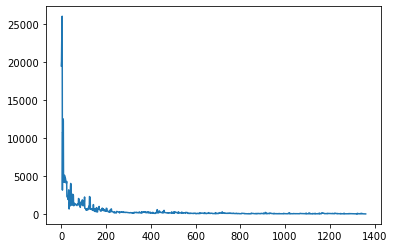

274

In [24]:
fig, ax = plt.subplots()
ax.plot(error)
plt.show()
error[-1]
len(neurons)

# Data utils

In [7]:
def split_data(data, labels):
    data_sep = []
    uniq_labels = list(set(sorted(labels)))
    for cl in uniq_labels:
        data_class = np.zeros((1,2))
        for i,lab in enumerate(labels):
            if(cl == lab):
                data_class = np.append(data_class, [data[i]], axis=0)
        data_class = data_class[1:]
        data_sep.append(data_class)
    return data_sep, uniq_labels

# graph separated data w/ plt
def plt_graph_sep_data(data):
    fig, ax = plt.subplots()
    for cl in data:
        ax.scatter(cl[:,0], cl[:,1])
    plt.show()

def classify(pred, labels):
    if(type(pred) == np.ndarray):
        typ = -np.inf
        cls = 0
        for i,p in enumerate(pred):
            if(p > typ):
                typ = p
                cls = i
        return cls
        
    else:
        uniqs = list(set(sorted(labels)))
        min_d = np.inf
        min_i = 0
        for i,l in enumerate(uniqs):
            dis = abs(pred - l)
            if(dis < min_d):
                min_d = dis
                min_i = i
        return uniqs[min_i]
    
def test_model(model, data, labels):
    # new_data = np.array([*data[0:2], *data[100:102], *data[200:202]])
    # print(new_data.shape)
    truepos = 0
    preds = []
    print('Obtaining Predictions...')
    for d, l in tqdm(zip(data, labels)):
        pred = model.forward(d)
#         print(pred)
        pred = classify(pred,labels)
        preds.append(pred)
        if(pred == l):
            truepos += 1

    accuracy = truepos / len(data)
    print('Accuracy:', round(accuracy,2))
    
    data_sep, uniq_labels = split_data(data, preds)
#     data_sep.append(centers)
    plt_graph_sep_data(data_sep)
    
    return preds

In [8]:
def grid_search(data, model, step=(.5,.5)):
    # generate data
    x = np.arange(min(data[:,0]), max(data[:,0]), step[0])
    y = np.arange(min(data[:,1]), max(data[:,1]), step[1])

    # grid_xy = np.zeros((len(x), len(x)))
    xy_data  = []
    xy_preds = []
    z_preds  = np.zeros((len(x), len(y)))
    z_data   = np.zeros((len(x), len(y)))
    for i in tqdm(range(len(x))):
        for j in range(len(y)):
            pred = model.forward([x[i], y[j]])
            z    = copy.deepcopy(pred)
            pred = classify(pred,labels)
            xy_data.append([x[i], y[j]])
            xy_preds.append(pred)
            z_preds[i,j] = pred
            z_data[i,j]  = z
    
    # predict on grid
    xy_sep, xy_uniq_labels = split_data(xy_data, xy_preds)
    plt_graph_sep_data(xy_sep)
    
    # Plot surface - raw predictions
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xy_data, xy_preds, z_data = np.array(xy_data), np.array(xy_preds), np.array(z_data)
    Y, X = np.meshgrid(y, x)
    ax.plot_surface(X, Y, z_data, cmap=cm.coolwarm)
    plt.show()

# Raw KNN

In [11]:
combined_x = []
combined_y = []
for i, cls in enumerate([class_1, class_2]):
    for d in cls:
        combined_x.append(d)
        combined_y.append(i)
combined_x = np.array(combined_x)
combined_y = np.array(combined_y)

6it [00:00, 29.68it/s]

Obtaining Predictions...


5276it [03:01, 29.12it/s]


Accuracy: 1.0


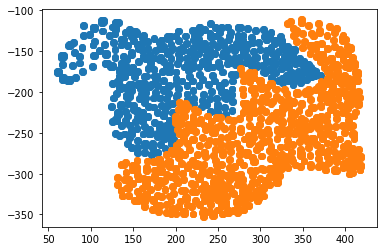

Length training set: 5276
Time to test: 181.3095953464508
Time to complete: 181.3095953464508


In [21]:
import knn
reload(knn)

t0 = time.time()


knn_model = knn.KNN(5, combined_x, combined_y)

t1 = time.time()
preds = test_model(knn_model, combined_x, combined_y)

# rewrite test_model for no centers, no display
# need full test both on combined_x, with accuracy numberss


t2 = time.time()
print('Length training set:',len(combined_x))
print('Time to test:', t2-t1)
print('Time to complete:', t2-t0)

In [18]:
# preds = test_model(rbnetwork, combined_x, combined_y)
len(combined_x)

5276

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [02:25<00:00,  2.03s/it]


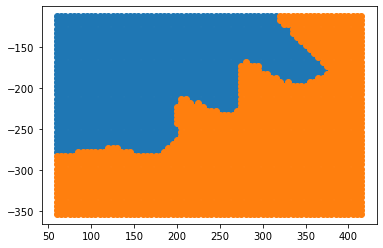

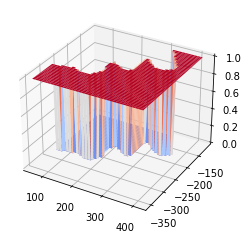

In [33]:
grid_search(combined_x, knn_model, step=(5, 5))

# GNG to KNN

  0%|▏                                                                                                                | 6/3186 [00:00<01:02, 50.54it/s]

Error target met!


 30%|█████████████████████████████████▏                                                                             | 448/1500 [00:57<02:15,  7.75it/s]
112it [00:00, 561.26it/s]

Error target met!
Obtaining Predictions...


5276it [00:09, 565.89it/s]


Accuracy: 0.97


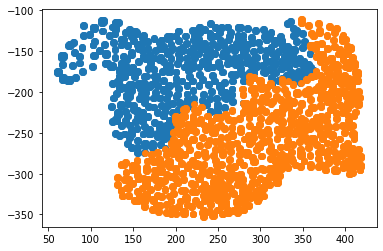

Length training set: 167
Time to test: 9.464557886123657
Time to complete: 209.9520833492279


In [24]:
import knn
reload(knn)
reload(gng)

t0 = time.time()


gng_model_1 = gng.GNG()
neurons_1, error_1 = gng_model_1.train(class_1,
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=125)

gng_model_2 = gng.GNG()
neurons_2, error_2 = gng_model_2.train(class_2,
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=125)


gng_combined_x = []
gng_combined_y = []
for i, cls in enumerate([neurons_1, neurons_2]):
    for d in cls:
        gng_combined_x.append(d)
        gng_combined_y.append(i)
gng_combined_x = np.array(gng_combined_x)
gng_combined_y = np.array(gng_combined_y)


knn_model = knn.KNN(5, gng_combined_x, gng_combined_y)

t1 = time.time()

preds = test_model(knn_model, combined_x, combined_y)

t2 = time.time()
print('Length training set:',len(gng_combined_x))
print('Time to test:', t2-t1)
print('Time to complete:', t2-t0)

31it [00:00, 306.65it/s]

Obtaining Predictions...


5276it [00:17, 305.28it/s]


Accuracy: 0.99


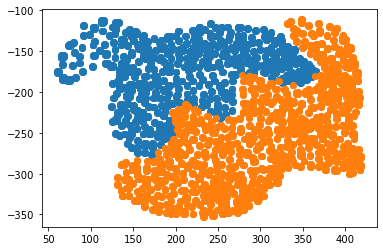

Length training set: 403
Time to complete: 17.401376247406006


In [20]:
import knn
reload(knn)
reload(gng)

t0 = time.time()

knn_model = knn.KNN(5, gng_combined_x, gng_combined_y)
preds = test_model(knn_model, combined_x, combined_y)

t1 = time.time()
print('Length training set:',len(gng_combined_x))
print('Time to complete:', t1-t0)

# Image Data

In [10]:
device = 'cuda:0'
# Load ResNet50
torch_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize( [0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225] ) 
])
resnet50_model = models.resnet50(pretrained=True)
resnet50_model = torch.nn.Sequential(   *list(resnet50_model.children())[:-2], 
                                        torch.nn.MaxPool2d((7,7)) )
# resnet50_model = torch.nn.Sequential( *list(resnet50_model.children())[:-2] )

resnet50_model = resnet50_model.to(device)
resnet50_model.eval()


# Load Autoencoder
# autoencoder = AE(2048, 128, device, model='./models/model_128_copy.pt')

# autoencoder = autoencoder.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


## Training data

In [15]:
dirs_init   = []
dirs_stream = []

# separate data dirs 
root = 'data/image_train/'
for i, d in enumerate(os.listdir(root)):
    dirs_init.append(os.path.join(root,d))

root = 'data/image_test/'
for i, d in enumerate(os.listdir(root)):
    dirs_stream.append(os.path.join(root,d))

init_images = []
init_labels = []

# For first 'num_init_dirs' in chipped image directory
# Get all chips
for d in dirs_init:
    for sub in os.listdir(d):
        img   = Image.open(os.path.join(d, sub))
        label = sub.split('_')[0]
        # debug(label)
        new_img = torch.tensor(torch_trans(img).reshape(3,224,224)).numpy()
        init_images.append(copy.deepcopy(new_img))
        init_labels.append(label)

C:\Users\jschu\miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [16]:
# Run through resnet to get features (2048x7x7) (max pooled: 2048)
features = []
for img in init_images:
    feat = torch.squeeze(resnet50_model(torch.tensor(img).unsqueeze(0).to(device)).cpu()).detach().numpy()

    # Manual maxpooling
    if(False):
        vect = []
        for grid in feat:
            vect.append(np.max(grid))

        features.append( np.array(vect) )
    
    else:
        features.append(feat)

# Reduce features with autoencoder (1x128)
reduced_init = []
for img in features:
    # reshape, put on gpu
    img = torch.tensor(img).reshape((1, 2048)).to(device)
    # run through ae
    img = autoencoder.forward( img )
    # detach to cpu, convert to numpy array
    img = img.cpu().detach().squeeze(0).numpy()
    # Append to data
    reduced_init.append( copy.deepcopy(img) )
reduced_init = np.array(reduced_init)

NameError: name 'autoencoder' is not defined

## Testing Data

In [17]:
test_images = []
test_labels = []
# For first 'num_init_dirs' in chipped image directory
# Get all chips
for d in dirs_stream:
    for sub in os.listdir(d):
        img   = Image.open(os.path.join(d, sub))
        label = sub.split('_')[0]
        # debug(label)
        if(label == 'human' or label == 'car'):
            new_img = torch.tensor(torch_trans(img).reshape(3,224,224)).numpy()
            test_images.append(copy.deepcopy(new_img))
            test_labels.append(label)

C:\Users\jschu\miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


In [18]:
# Run through resnet to get features (2048x7x7) (max pooled: 2048)
test_features = []
for img in test_images:
    feat = torch.squeeze(resnet50_model(torch.tensor(img).unsqueeze(0).to(device)).cpu()).detach().numpy()

    # Manual maxpooling
    if(False):
        vect = []
        for grid in feat:
            vect.append(np.max(grid))

        test_features.append( np.array(vect) )
    
    else:
        test_features.append(feat)

# Reduce features with autoencoder (1x128)
reduced_test = []
for img in test_features:
    # reshape, put on gpu
    img = torch.tensor(img).reshape((1, 2048)).to(device)
    # run through ae
    img = autoencoder.forward( img )
    # detach to cpu, convert to numpy array
    img = img.cpu().detach().squeeze(0).numpy()
    # Append to data
    reduced_test.append( copy.deepcopy(img) )
reduced_test = np.array(reduced_test)

NameError: name 'autoencoder' is not defined

In [19]:
# text labels to num
uniqs = list(set(sorted(init_labels)))
init_labels_num = []
for lab in init_labels:
    init_labels_num.append(uniqs.index(lab))
    
uniqs = list(set(sorted(test_labels)))
test_labels_num = []
for lab in test_labels:
    test_labels_num.append(uniqs.index(lab))

In [20]:
def test_md_model(model, data, labels):
    truepos = 0
    preds = []
    print('Obtaining Predictions...')
    for d, l in tqdm(zip(data, labels)):
        pred = model.forward(d)
#         print(pred, l)
        pred = classify(pred,labels)
        preds.append(pred)
        if(pred == l):
            truepos += 1

    accuracy = truepos / len(data)
    print('Accuracy:', round(accuracy,2))
    
    return preds

## KNN raw

In [19]:
# raw: features
# reduced: reduced_init
# labels: init_labels
# num labels: init_labels_num

# raw: test_features
# reduced: reduced_test
# labels: test_labels
# num labels: test_labels_num
import knn

knn_model = knn.KNN(5, features, init_labels_num)
preds = test_md_model(knn_model, test_features, test_labels_num)


116it [00:00, 1587.55it/s]

Obtaining Predictions...
Accuracy: 0.98


In [20]:
knn_model = knn.KNN(5, reduced_init, init_labels_num)
preds = test_md_model(knn_model, reduced_test, test_labels_num)

116it [00:00, 1704.28it/s]

Obtaining Predictions...
Accuracy: 0.97


## KNN w/ GNG

In [75]:
# raw
reload(gng)

gng_model_0 = gng.GNG()
neurons_0, error_0 = gng_model_0.train(
    [img for img,label in zip(features, init_labels_num) if label == 0],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=35)

gng_model_1 = gng.GNG()
neurons_1, error_1 = gng_model_1.train(
    [img for img,label in zip(features, init_labels_num) if label == 1],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target= 35)

gng_combined_x = []
gng_combined_y = []
for i, cls in enumerate([neurons_0, neurons_1]):
    for d in cls:
        gng_combined_x.append(d)
        gng_combined_y.append(i)
gng_combined_x = np.array(gng_combined_x)
gng_combined_y = np.array(gng_combined_y)

knn_model = knn.KNN(5, gng_combined_x, gng_combined_y)
preds = test_md_model(knn_model, test_features, test_labels_num)

  1%|▊                                                                                                              | 11/1500 [00:00<00:14, 105.67it/s]

Error target met!


 28%|███████████████████████████████▎                                                                               | 423/1500 [00:06<00:15, 69.95it/s]
116it [00:00, 864.89it/s]

Error target met!
Obtaining Predictions...
Accuracy: 0.98


In [77]:
len(features)

100

In [74]:
# reduced
reload(gng)

gng_model_0 = gng.GNG()
neurons_0, error_0 = gng_model_0.train(
    [img for img,label in zip(reduced_init, init_labels_num) if label == 0],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=35)

gng_model_1 = gng.GNG()
neurons_1, error_1 = gng_model_1.train(
    [img for img,label in zip(reduced_init, init_labels_num) if label == 1],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=35)

gng_combined_x = []
gng_combined_y = []
for i, cls in enumerate([neurons_0, neurons_1]):
    for d in cls:
        gng_combined_x.append(d)
        gng_combined_y.append(i)
gng_combined_x = np.array(gng_combined_x)
gng_combined_y = np.array(gng_combined_y)

knn_model = knn.KNN(5, gng_combined_x, gng_combined_y)
preds = test_md_model(knn_model, reduced_test, test_labels_num)

  0%|                                                                                                                         | 0/1500 [00:00<?, ?it/s]
116it [00:00, 23183.99it/s]

Error target met!
Error target met!
Obtaining Predictions...
Accuracy: 0.54


## With Benches

In [21]:
exp3_images = []
exp3_labels = []
# For first 'num_init_dirs' in chipped image directory
# Get all chips
for d in dirs_stream:
    for sub in os.listdir(d):
        img   = Image.open(os.path.join(d, sub))
        label = sub.split('_')[0]
        # debug(label)
        if(label == 'human' or label == 'car' or label == 'bench'):
            new_img = torch.tensor(torch_trans(img).reshape(3,224,224)).numpy()
            exp3_images.append(copy.deepcopy(new_img))
            exp3_labels.append(label)

C:\Users\jschu\miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


In [31]:
# Run through resnet to get features (2048x7x7) (max pooled: 2048)
exp3_features = []
for img in exp3_images:
    feat = torch.squeeze(resnet50_model(torch.tensor(img).unsqueeze(0).to(device)).cpu()).detach().numpy()

    # Manual maxpooling
    if(False):
        vect = []
        for grid in feat:
            vect.append(np.max(grid))

        exp3_features.append( np.array(vect) )
    
    else:
        exp3_features.append(feat)

# # Reduce features with autoencoder (1x128)
# exp3_reduced = []
# for img in exp3_features:
#     # reshape, put on gpu
#     img = torch.tensor(img).reshape((1, 2048)).to(device)
#     # run through ae
#     img = autoencoder.forward( img )
#     # detach to cpu, convert to numpy array
#     img = img.cpu().detach().squeeze(0).numpy()
#     # Append to data
#     exp3_reduced.append( copy.deepcopy(img) )
# exp3_reduced = np.array(exp3_reduced)


In [32]:
count = {'human':0,'car':0,'bench':0}
for lab in exp3_labels:
    count[lab] += 1
count

{'human': 63, 'car': 53, 'bench': 54}

In [33]:
uniqs = list(set(sorted(exp3_labels)))
exp3_labels_num = []
for lab in exp3_labels:
    exp3_labels_num.append(uniqs.index(lab))

In [37]:
training_num = 30
exp3_training_x = []
exp3_training_x_reduced = []
exp3_training_y = []
exp3_testing_x  = []
exp3_testing_x_reduced  = []
exp3_testing_y  = []

for x,y in zip(exp3_features, exp3_labels_num):
    if(len([lab for lab in exp3_training_y if lab == y]) < training_num):
        exp3_training_x.append(x)
        exp3_training_y.append(y)
    else:
        exp3_testing_x.append(x)
        exp3_testing_y.append(y)

In [38]:
len(exp3_training_y)

90

In [44]:
# raw raw
import knn
knn_model = knn.KNN(5, exp3_training_x, exp3_training_y)
preds = test_md_model(knn_model, exp3_testing_x, exp3_testing_y)

80it [00:00, 1612.81it/s]

Obtaining Predictions...
Accuracy: 0.93


In [42]:
# gng raw
import gng
reload(gng)

t0 = time.time()

gng_model_0 = gng.GNG()
neurons_0, error_0 = gng_model_0.train(
    [img for img,label in zip(exp3_training_x, exp3_training_y) if label == 0],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=.00001)

gng_model_1 = gng.GNG()
neurons_1, error_1 = gng_model_1.train(
    [img for img,label in zip(exp3_training_x, exp3_training_y) if label == 1],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=.00001)

gng_model_2 = gng.GNG()
neurons_2, error_2 = gng_model_2.train(
    [img for img,label in zip(exp3_training_x, exp3_training_y) if label == 2],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=.00001)

gng_combined_x = []
gng_combined_y = []
for i, cls in enumerate([neurons_0, neurons_1, neurons_2]):
    for d in cls:
        gng_combined_x.append(d)
        gng_combined_y.append(i)
gng_combined_x = np.array(gng_combined_x)
gng_combined_y = np.array(gng_combined_y)

knn_model = knn.KNN(5, gng_combined_x, gng_combined_y)
preds = test_md_model(knn_model, exp3_testing_x, exp3_testing_y)

t1 = time.time()
print('Time to complete:', t1-t0)
print('length neurons:',len(gng_combined_x))

  1%|▊                                                                                                              | 11/1500 [00:00<00:14, 100.83it/s]

Error target met!


  1%|▋                                                                                                               | 10/1500 [00:00<00:14, 99.91it/s]

Error target met!


 54%|███████████████████████████████████████████████████████████▌                                                   | 805/1500 [00:15<00:13, 52.20it/s]
32it [00:00, 313.44it/s]

Error target met!
Obtaining Predictions...


80it [00:00, 308.60it/s]

Accuracy: 0.97
Time to complete: 43.58255100250244
length neurons: 483


In [43]:
# gnf raw
import gnf
reload(gnf)

t0 = time.time()

gnf_model_0 = gnf.GNF()
neurons_0, error_0 = gnf_model_0.train(
    [img for img,label in zip(exp3_training_x, exp3_training_y) if label == 0],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=.00001)

gnf_model_1 = gnf.GNF()
neurons_1, error_1 = gnf_model_1.train(
    [img for img,label in zip(exp3_training_x, exp3_training_y) if label == 1],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=.00001)

gnf_model_2 = gnf.GNF()
neurons_2, error_2 = gnf_model_2.train(
    [img for img,label in zip(exp3_training_x, exp3_training_y) if label == 2],
                epochs=1500, 
                learning_b=.5, 
                learning_n=.01, 
                age_max=4, 
                gamma=5,
                error_alpha=.1,
                error_d=.98,
                error_target=.00001)

gng_combined_x = []
gng_combined_y = []
for i, cls in enumerate([neurons_0, neurons_1, neurons_2]):
    for d in cls:
        gng_combined_x.append(d)
        gng_combined_y.append(i)
gng_combined_x = np.array(gng_combined_x)
gng_combined_y = np.array(gng_combined_y)

knn_model = knn.KNN(5, gng_combined_x, gng_combined_y)
preds = test_md_model(knn_model, exp3_testing_x, exp3_testing_y)

t1 = time.time()
print('Time to complete:', t1-t0)
print('length neurons:',len(gng_combined_x))

  1%|▊                                                                                                              | 11/1500 [00:00<00:14, 103.68it/s]

Error target met!


  1%|▋                                                                                                               | 10/1500 [00:00<00:14, 99.51it/s]

Error target met!


 55%|█████████████████████████████████████████████████████████████▍                                                 | 830/1500 [00:21<00:17, 39.36it/s]
63it [00:00, 313.75it/s]

Error target met!
Obtaining Predictions...


80it [00:00, 306.24it/s]

Accuracy: 0.99
Time to complete: 61.5656635761261
length neurons: 486
